# Project Statistical Machine Learning

## Informations
Team:(2 peoples)

Aurélien PARDO:
- Degree Program: Erasmus

Julien DUCREY:
- Degree Program: Erasmus
- Email: julienducrey2001@gmail.com

## Virtual Environnment version python 3.10 with the following library/packages :
- Numpy
- Pandas
- Matplotlib
- Statsmodels
- Scikit-learn
- Seaborn
- PyTorch

### Packages:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import sklearn as sk
import matplotlib.pyplot as plt
import torch

### Objective 1 :

Considering a linear relationship between target and predictors, the company is interested in 
understanding the delta changes (that is, a 1-unit increase in the predictor leads to a XX 
variation in the target).  
 
### Objective 2 :
The company in 2024 wants to open 3 new markets: 1 MINI, 1 SUPER and 1 HYPER. 
There are multiple options to choose from. For this second objective the goal is to find for each market type which is the best one to open 
in 2024.

### Objective 1 
- Data cleaning :
    1. Read the both .csv file using pandas 
    2. Print both files and see if they have been read properly: sometimes there are 
    empty columns  
    3. Check for NaN values and/or errors: be careful here! Read the above structure of 
    the files and check column by column if you see something that shouldn’t be there 
- Generate the dataset – part 1: you may have noticed that “sales.csv” contains 
temporal  information.  To  capture  the  main  relationships  between  target  and 
predictors you could collapse the temporal dimension 
- Generate the dataset – part 2: now that you have a new dataset without the dates, 
you can merge it with “market.csv”. Let’s call this new dataset “merged_df” 
- Data visualization: use “merged_df” to explore the data. Do you see any predictors 
that could help in explaining the target? Do you see any outliers?  
- Encode categorical variables 
- Finally, fit a linear model and answer to “objective 1”. When answering, think about 
“feature selection” and “dimension reduction methods”: do you think they can be 
useful? Explain why. 
 
Objective 2 
Starting from the latest dataset generated in the previous point, test all the models that we 
studied throughout this course. Pick the best model (explain clearly what it means “best 
model”) and then apply it to the above options to select the most profitable market per each 
type. Recall that the company is interested in opening 3 new markets: 1 MINI, 1 SUPER and 1 
HYPER. 

First thing first, which is the target for this task? It’s “sales_amount”. Clearly, we want to open 
markets with the highest revenues!

### Data cleaning:

The retail company gives us the access to 2 datasets:
- one for the sales of each market, for each days from the 1st January 2021, to the 31st December 2022.
- another one, for the features of each of these markets, of the retail company.

In [2]:
# we read the both files .csv using pandas
df_sales=pd.read_csv("sales.csv")
df_market=pd.read_csv("market.csv")

We are going to clean each datasets :

### Dataset sales:

In [3]:
df_sales

,market_id,date,is_open,sales_amount,
0,XC14,31/12/2022,YES,55727.34,NaN
1,WG25,31/12/2022,YES,12984.10,NaN
2,UX72,31/12/2022,YES,13046.56,NaN
3,EE84,31/12/2022,YES,60916.76,NaN
4,RF54,31/12/2022,YES,12376.42,NaN
...,...,...,...,...,...
523944,ZM74,01/01/2021,YES,21553.84,NaN
523945,WW60,01/01/2021,YES,56371.18,NaN
523946,LU14,01/01/2021,YES,24107.19,NaN
523947,HY57,01/01/2021,YES,12257.38,NaN


For the sales, we can already see that the last column is empty. We will remove it and search for other eventual missing or wrong values, on each remaining column.

For this, we can use the following instruction:

In [4]:
df_sales.isna().sum()

market_id            1
date                 1
is_open              1
sales_amount        15
                523949
dtype: int64

We now know that the last column, is completly full of Nan values, but also that there is other missing values, in the remaining columns. 

In [5]:
#we remove the empty column:
df_sales.dropna(axis=1,how="all",inplace=True)
df_sales

,market_id,date,is_open,sales_amount
0,XC14,31/12/2022,YES,55727.34
1,WG25,31/12/2022,YES,12984.10
2,UX72,31/12/2022,YES,13046.56
3,EE84,31/12/2022,YES,60916.76
4,RF54,31/12/2022,YES,12376.42
...,...,...,...,...
523944,ZM74,01/01/2021,YES,21553.84
523945,WW60,01/01/2021,YES,56371.18
523946,LU14,01/01/2021,YES,24107.19
523947,HY57,01/01/2021,YES,12257.38


In [6]:
df_sales.isna().sum() # There are always the rows, with missing values to remove.

market_id        1
date             1
is_open          1
sales_amount    15
dtype: int64

The total number of samples is sufficient, compared to that of those with missing or wrong values, to can remove them without impact on the representativity of the distribution of datas. 
So we decide to remove the samples, with missing or wrong values.

We start by removing the rows, with almost one missing values:

In [7]:
#we now remove the rows, with almost one missing values:
df_sales.dropna(how="any",inplace=True)
df_sales.reset_index(drop=True,inplace=True)
df_sales

,market_id,date,is_open,sales_amount
0,XC14,31/12/2022,YES,55727.34
1,WG25,31/12/2022,YES,12984.10
2,UX72,31/12/2022,YES,13046.56
3,EE84,31/12/2022,YES,60916.76
4,RF54,31/12/2022,YES,12376.42
...,...,...,...,...
523929,ZM74,01/01/2021,YES,21553.84
523930,WW60,01/01/2021,YES,56371.18
523931,LU14,01/01/2021,YES,24107.19
523932,HY57,01/01/2021,YES,12257.38


We can observe that there are 15 rows less than before, so there was among the rows with missing values, almost one with more than one missing values.

We could also verify that there are now no more missing values, with:

In [8]:
df_sales.isna().sum()

market_id       0
date            0
is_open         0
sales_amount    0
dtype: int64

##### Now, we only have to verify the conformity of values, on each column.

### Colmun "date":

We check that no date is prior to 01/01/2021.

In [9]:
(df_sales["date"]<"01/01/2021").sum()

0

We also check no date is later than 31/12/2022.

In [10]:
(df_sales["date"]>"31/12/2022").sum()

0

Hence, the values on the colmun "date" are consistent.

### Column "is_open":

To check the values of column "is_open", we can check if:
- All the elements in the columns "is_open" are in the list "YES" or "NO"

In [11]:
df_sales[~df_sales["is_open"].isin(["YES","NO"])] # ~_.isin() return the values that are not here in "YES" or "NO"

,market_id,date,is_open,sales_amount
49153,BT51,14/10/2022,YESS,25220.48


Here, instead of just delete the row, we can understand that the true value is "YES". There is only a little error, so we can replace "YESS" by "YES".

In [12]:
df_sales.at[49153,"is_open"]="YES"

Check if it's well now

In [13]:
df_sales[~df_sales["is_open"].isin(["YES","NO"])]

,market_id,date,is_open,sales_amount


Perfect!

### Column "sales_amount":

1) We check if, all the values in the columns "sales_amount" are > or = to 0

2) After, using values two different values of column "is_open", we look if :
    - all the values in the columns "sales_amount" are equal to 0, when the values of "is_open" is "NO".
    - all the values in the columns "sales_apount" are stricly grower than 0, when the values of "is_open" is "YES".

1) We check if, all the values in the columns "sales_amount" are > or = to 0

In [14]:
df_sales.loc[df_sales["sales_amount"]<0]

,market_id,date,is_open,sales_amount
47527,XC14,16/10/2022,YES,-999999.0
48149,XC14,15/10/2022,YES,-999999.0
48771,XC14,14/10/2022,YES,-999999.0
49393,XC14,13/10/2022,YES,-999999.0
50015,XC14,12/10/2022,YES,-999999.0
50637,XC14,11/10/2022,YES,-999999.0


We obtain 6 values where "sales_amount" < 0 (-999999.0), only for days where the same market is open. To deal with we can juste remove the rows (sales) or we could replace these values by the mean of sales amount group by market id (we compute the mean only on the positive value of sales amount).

We will choose the second option.

If these days, the market was closed, we could have replaced the negative values by 0.

Now, we replace the rows, with the mean of sales amount of the market id in the previous index values:

In [15]:
mean_sales_amount_by_market=df_sales[df_sales["sales_amount"]>0].groupby(by="market_id")["sales_amount"].mean() 
mean_sales_amount_by_market

market_id
AA39    12609.579520
AA82    26573.814219
AB90    26124.283769
AC71    11856.326518
AD13    12392.551096
            ...     
ZX46    12570.549505
ZX76    12375.246473
ZY62    26404.851308
ZZ11    12542.256577
ZZ13    12427.376908
Name: sales_amount, Length: 750, dtype: float64

In [16]:
index_sales=df_sales.loc[df_sales["sales_amount"]<0].index # We collect the index of the data points with sales amounts <0
index_sales 

Index([47527, 48149, 48771, 49393, 50015, 50637], dtype='int64')

In [17]:
# we assign the sales_amount corresponding of the mean of sales amount of the market id in the previous index
df_sales.iloc[index_sales,df_sales.columns.get_loc("sales_amount")]=mean_sales_amount_by_market[df_sales.iloc[index_sales,df_sales.columns.get_loc("market_id")]]

Check if it works:

In [18]:
df_sales.loc[df_sales["sales_amount"]<0]

,market_id,date,is_open,sales_amount


Now we are sure that all values in "sales_amount" are positve.

2) After, using two different values of column "is_open", we look if :
    - all the values in the columns "sales_amount" are equal to 0, when the values of "is_open" is "NO".
    - all the values in the columns "sales_apount" are stricly grower than 0, when the values of "is_open" is "YES".

For the open days:

In [19]:
df_sales.loc[(df_sales["is_open"]=="YES") & (df_sales["sales_amount"]<=0)]

,market_id,date,is_open,sales_amount


So we are sure that, when then the markets are opened, they are striclty positive revenues.

For the no open days:
Logically, if the markets are not open, they shouldn't do any sales. So there are no revenues.

For the no open days, we should not find any sales_amount different of 0.

In [20]:
df_sales.loc[(df_sales["is_open"]=="NO") & (df_sales["sales_amount"]!=0)]

,market_id,date,is_open,sales_amount
752,EE84,30/12/2022,NO,9999999.0


We find one, so we can simply remove it or just replace the value of "sales_amount" by 0. 

We will replace the value by 0:

In [21]:
df_sales.at[752,"sales_amount"]=0

We check:

In [22]:
df_sales.loc[(df_sales["is_open"]=="NO") & (df_sales["sales_amount"]!=0)]

,market_id,date,is_open,sales_amount


It's well done.

### Search of duplicates:

To finish the cleaning of the dataframe of sales, we can verify that there are no duplicates rows in df_sales, with the following instruction:

In [23]:
len(df_sales)

523934

In [24]:
df_sales.drop_duplicates()

,market_id,date,is_open,sales_amount
0,XC14,31/12/2022,YES,55727.34
1,WG25,31/12/2022,YES,12984.10
2,UX72,31/12/2022,YES,13046.56
3,EE84,31/12/2022,YES,60916.76
4,RF54,31/12/2022,YES,12376.42
...,...,...,...,...
523929,ZM74,01/01/2021,YES,21553.84
523930,WW60,01/01/2021,YES,56371.18
523931,LU14,01/01/2021,YES,24107.19
523932,HY57,01/01/2021,YES,12257.38


We observe that there are the same number of rows than expected, so there wasn't any duplicates in this dataframe.

The dataframe of the sales is now considered as cleaned.

### Dataset market:
For this Dataset, we have done the following:
- remove the empty column.
- check each remaining column.
- fill the remaining NaN values.

In [25]:
df_market

,id,country,Unnamed: 2,market_type,square_feet,avg_customers,competitor_distance,has_promotions
0,XC14,SPAIN,NaN,HYPER,11135,773.0,515,YES
1,WG25,FRANCE,NaN,MINI,1402,252.0,522,YES
2,UX72,FRANCE,NaN,MINI,1452,265.0,15939,YES
3,EE84,SPAIN,NaN,HYPER,15259,874.0,754,YES
4,RF54,FRANCE,NaN,MINI,2497,191.0,34007,YES
...,...,...,...,...,...,...,...,...
745,ZM74,ITALY,NaN,SUPER,5778,356.0,4424,YES
746,WW60,FRANCE,NaN,HYPER,10923,907.0,41359,YES
747,LU14,ITALY,NaN,SUPER,5742,397.0,2841,YES
748,HY57,ITALY,NaN,MINI,2495,228.0,3848,YES


Cleaning:
- Let's verify if there are empty columns/duplicates rows/ and clean the Nan values/errors.
- We can rename the first column "id" into "market_id" to match the names with sales dataset.

In [26]:
df_market = df_market.rename(columns={"id":"market_id"}) # We apply pandas method rename() to rename columns or index.
df_market

,market_id,country,Unnamed: 2,market_type,square_feet,avg_customers,competitor_distance,has_promotions
0,XC14,SPAIN,NaN,HYPER,11135,773.0,515,YES
1,WG25,FRANCE,NaN,MINI,1402,252.0,522,YES
2,UX72,FRANCE,NaN,MINI,1452,265.0,15939,YES
3,EE84,SPAIN,NaN,HYPER,15259,874.0,754,YES
4,RF54,FRANCE,NaN,MINI,2497,191.0,34007,YES
...,...,...,...,...,...,...,...,...
745,ZM74,ITALY,NaN,SUPER,5778,356.0,4424,YES
746,WW60,FRANCE,NaN,HYPER,10923,907.0,41359,YES
747,LU14,ITALY,NaN,SUPER,5742,397.0,2841,YES
748,HY57,ITALY,NaN,MINI,2495,228.0,3848,YES


In the market dataframe, we find another empty column named "Unnamed: 2", that we will can remove. 

We also remark that there are other missing values, in columns "market_type" and "avg_customers". 

In [27]:
df_market.isna().sum()

market_id                0
country                  0
Unnamed: 2             750
market_type              2
square_feet              0
avg_customers            1
competitor_distance      0
has_promotions           0
dtype: int64

In [28]:
# we remove the empty column:
df_market.dropna(axis=1,how="all",inplace=True)
df_market

,market_id,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions
0,XC14,SPAIN,HYPER,11135,773.0,515,YES
1,WG25,FRANCE,MINI,1402,252.0,522,YES
2,UX72,FRANCE,MINI,1452,265.0,15939,YES
3,EE84,SPAIN,HYPER,15259,874.0,754,YES
4,RF54,FRANCE,MINI,2497,191.0,34007,YES
...,...,...,...,...,...,...,...
745,ZM74,ITALY,SUPER,5778,356.0,4424,YES
746,WW60,FRANCE,HYPER,10923,907.0,41359,YES
747,LU14,ITALY,SUPER,5742,397.0,2841,YES
748,HY57,ITALY,MINI,2495,228.0,3848,YES


## We will now check each column of the dataframe and deal with the remaining missing values:

### Column "market_id":
Each row must represent one unique market, with its feature on the other columns.

So, we check if column "id" only have unique values:

In [29]:
# we count the number of duplicated values in the column "id".
df_market["market_id"].duplicated().sum()

0

There are no duplicated values in the column, so we deduce there are no duplicated rows (markets) in the dataset.

### Column "country":

We can check, if all values in this column are true name of countries, without little error:

In [30]:
df_market["country"].unique()

array(['SPAIN', 'FRANCE', 'ITALY'], dtype=object)

So, the dataset have information on the markets, of only 3 countries "SPAIN", "FRANCE" and "ITALY".

### Column "competitor_distance":
This column represents the distance in meters, from nearest competitor. It must be postive integers:

In [31]:
df_market["competitor_distance"].dtype

dtype('int64')

In [32]:
df_market[df_market["competitor_distance"]<0]

,market_id,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions


So, all values are consistents, for this column.

### Column "has_promotions"
This columns allows only two values:
"YES":the market may have promotions.
"NO":the market cannot apply any promotion.

We check that all values are "YES" or "NO":

In [33]:
df_market["has_promotions"].dtype #type object

dtype('O')

In [34]:
df_market["has_promotions"].unique()

array(['YES', 'NO'], dtype=object)

So there are not non allowed or missing values, in this column.

### Column "square_feet":
This column represents the size of the market in square feets, it must be a positive integer.

We check it:

In [35]:
df_market[df_market["square_feet"]<=0]

,market_id,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions


In [36]:
df_market["square_feet"].dtype

dtype('int64')

The values of this column are consistent.

### So now, the columns ["id","country","competitor_distance","has_promotions"] are checked.

### It remains only the columns ["market_type","avg_customers"] to check.

In the following of the data cleaning, we have seen that:
- in column "market_type", there are 2 missing values.
- in column "avg_customers", there are 1 missing values and 1 wrong negative values.

In [37]:
df_market.isna().sum()

market_id              0
country                0
market_type            2
square_feet            0
avg_customers          1
competitor_distance    0
has_promotions         0
dtype: int64

In [38]:
df_market[df_market["avg_customers"]<=0]

,market_id,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions
69,IP89,SPAIN,HYPER,15560,-9999.0,6281,YES


We decide to replace the wrong and the missing values of "avg_customers", by the average of the "avg_customers" us positive values, of market of the same "market_type", than the concerned market of each row.

The order in which, we replace the wrong and the missing values, of the column "avg_customers" doesn't matter, because it doesn't change the average, on the positive values of the column.

But there is a problem, with the missing values in the column "market_type". Because we decide also to use the "square_feet" column, to replace the missing values, because it is very strongy correlated with the "market_type".

And one market with the "market_type" missing, seems to be an "HYPER", second its "square_feet" size. So when we replace this missing value, we have a new hypermarket, with an "avg_customers" value, which changes the value of the average on the positive values of this columns.

So we have a choice to make, with 2 possibles options:

#### Option 1:
- We start by replacing the missing values, in column "market_type". (changing the average on "avg_customers" of hypermarkets).
- We replace the wrong negative and the missing values, in column "avg_customers".

#### Option 2:
- We start by replacing the wrong negative and missing values, in column "avg_customers".
- After, we replace the missing values, in column "market_type". (don't take into account, the new hypermarket on the computation of the average, which replace the wrong and the missing values of "avg_customers" column)

We think that Options 2 is better, because even if we are quasi sure, of the value to give for the "market_type" missing values. It remains an assumption, so its better don't propagate the potentiel error on the average of "avg_customers", if we are not sure.

### Column "avg_customers"
The column represents the daily average of customers in the market. This makes it possible to link the daily average store attendance and the revenues obtained.

We check if it's well a positive number:

In [39]:
df_market["avg_customers"].dtype

dtype('float64')

In [40]:
df_market[df_market["avg_customers"]<=0]

,market_id,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions
69,IP89,SPAIN,HYPER,15560,-9999.0,6281,YES


We notice one wrong value in this columns. It's better to replace it, than remove it, because each row represents a market. So, if we remove rows in df_market, we must also remove the rows in the dataframe of sales (df_sales), which corresponds to these markets. This, because these sales without the feature of the corresponding markets, can't be used for our future analysis.

We will compute the value of the daily average of customers, in all the other markets of size "HYPER" in the same country (Spain). It's a good solution, to replace this value, because we can more reasonably expect, that an hypermarket have the same attendance than others hypermarkets in the same country, but not than minimarkets and supermarkets, due to their smaller sizes.

In [41]:
# We only average the positive and non missing values of avg_customers, to don't take into account the wrong value.
mean_avg_customers_by_market_type_country = df_market[df_market["avg_customers"]>0].groupby(by=["market_type","country"])["avg_customers"].mean()
mean_avg_customers_by_market_type_country

market_type  country
HYPER        FRANCE     688.258065
             ITALY      733.785714
             SPAIN      767.700000
MINI         FRANCE     210.527778
             ITALY      209.169643
             SPAIN      214.329114
SUPER        FRANCE     401.396825
             ITALY      401.293103
             SPAIN      405.333333
Name: avg_customers, dtype: float64

In [42]:
df_market.at[69,"avg_customers"]=mean_avg_customers_by_market_type_country["HYPER"]["SPAIN"]

In [43]:
df_market[df_market["avg_customers"]<=0]

,market_id,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions


It remains one missing value in this column. We will deal with it, now.

In [44]:
# to print all rows of the df, with almost one Nan values in the columns.
df_market.loc[df_market.isna().sum(axis=1)>0]

,market_id,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions
90,RU30,SPAIN,NaN,14305,637.0,1701,YES
225,KB10,ITALY,NaN,1520,150.0,479,YES
626,OD40,ITALY,HYPER,14157,NaN,3519,YES


As for the wrong value of the same column, we could simply replace it, by the average of the "avg_customers" us values, over all markets of the same type:

In [45]:
# We only average the positive and non missing values of avg_customers, to don't take into account the wrong value.
mean_avg_customers_by_market_type_country = df_market[df_market["avg_customers"]>0].groupby(by=["market_type","country"])["avg_customers"].mean()
mean_avg_customers_by_market_type_country

market_type  country
HYPER        FRANCE     688.258065
             ITALY      733.785714
             SPAIN      767.700000
MINI         FRANCE     210.527778
             ITALY      209.169643
             SPAIN      214.329114
SUPER        FRANCE     401.396825
             ITALY      401.293103
             SPAIN      405.333333
Name: avg_customers, dtype: float64

We notice that it's always the same value, for the average of the positve "avg_customers" values, because the value we give before, to the wrong negative value, was already the average, so it doesn't change its value.

In [46]:
# we replace the value.
df_market.at[626,"avg_customers"]=mean_avg_customers_by_market_type_country["HYPER"]["ITALY"]

In [47]:
df_market.loc[df_market.isna().sum(axis=1)>0]

,market_id,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions
90,RU30,SPAIN,NaN,14305,637.0,1701,YES
225,KB10,ITALY,NaN,1520,150.0,479,YES


Now, the missing values of the "market_type" are the only ones, remaining.

In [48]:
df_market.isna().sum()

market_id              0
country                0
market_type            2
square_feet            0
avg_customers          0
competitor_distance    0
has_promotions         0
dtype: int64

### Column "market_type":

The type of market, can only be MINI/SUPER/HYPER. We check, if it's well the case:

In [49]:
df_market["market_type"].unique()

array(['HYPER', 'MINI', 'SUPER', nan], dtype=object)

As already explained, for the wrong value in column "avg_customers". We could simply remove all the rows, with almost one missing values, like on the dataframe of sales. But we know that in df_market, each row represents a market. So, if we remove rows in df_market, we must also remove the rows in the dataframe of sales df_sales, which corresponds to these markets. This, because these sales without the feature of the corresponding markets, can't be used for our future analysis.

Besides, loosing samples of sales of markets, will not help for our analysis.

With this idea in head, a better solution would be to fill the following missing values of the rows.

To find with which replacing values, we could fill these rows, we should start by finding them, in the df_market: 

In [50]:
market_with_NaN=df_market.loc[df_market.isna().sum(axis=1)>0]
market_with_NaN

,market_id,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions
90,RU30,SPAIN,NaN,14305,637.0,1701,YES
225,KB10,ITALY,NaN,1520,150.0,479,YES


#### For the "market_type" missing values:

As we should expect it, the "market_type" and the "square_feet" of a market are very strongly correlated and this in all countries. Because it's logic that an hypermarket is suppost to have a bigger size, than a supermarket and a supermarket is also suppost to have a bigger size, than minimarket.

The following observations show this very well:

In [51]:
# Using groupby and min/max methods we compute the min/max of square feet group by market type
df_market.groupby(by="market_type")["square_feet"].min() ,df_market.groupby(by="market_type")["square_feet"].max()

(market_type
 HYPER    8484
 MINI     1400
 SUPER    4201
 Name: square_feet, dtype: int64,
 market_type
 HYPER    15560
 MINI      2599
 SUPER     7792
 Name: square_feet, dtype: int64)

We can see that :
- MINI "square_feet" is between 1400 and 2599 
- SUPER "square_feet" is between 4201 and 7792 
- HYPER "square_feet" is between 8484 and 15560

So we could consider that RU30 (14305 square feet) is a HYPER and KB10 is MINI (1520 square feet).

Let's now see a plot, to justify this idea:

c:\Users\pypar\anaconda3\envs\Statistical_ML_Project\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pypar\anaconda3\envs\Statistical_ML_Project\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pypar\anaconda3\envs\Statistical_ML_Project\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pypar\anaconda3\envs\Statistical_ML_Project\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

<Axes: xlabel='market_type', ylabel='square_feet'>

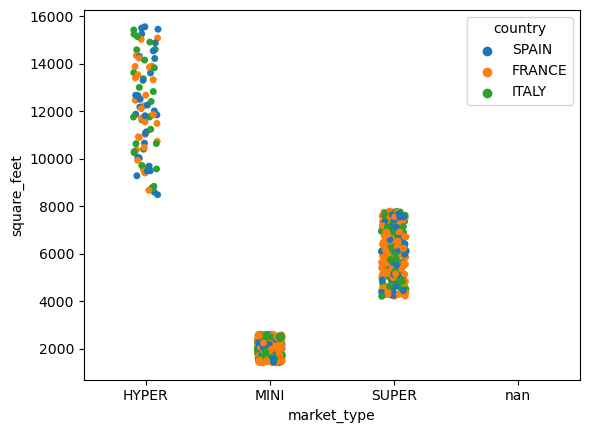

In [52]:
sns.stripplot(data=df_market,x="market_type",y="square_feet",hue="country")

Thanks to these observations of our datas, we can assume without many risk, that a market with a size under 3000 square feets, has "MINI" for "market_type" value. 

A market with a size between 4000 and 8000 square feets, should be a supermarket and to finish, a market with a size bigger than 8000 square feets, should be an hypermarket.

Second this, we could assume that the markets with the IDs "RU30" and "KB10", have for "market_type" values "HYPER" and "MINI", respectively, because their "square_feet" values are respectively, 14305 and 1520.

In [53]:
df_market.at[90,"market_type"]="HYPER"
df_market.at[225,"market_type"]="MINI"
df_market.loc[[90,225]]

,market_id,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions
90,RU30,SPAIN,HYPER,14305,637.0,1701,YES
225,KB10,ITALY,MINI,1520,150.0,479,YES


Now it doesn't remains any missing values, in the dataset df_market:

In [54]:
df_market.isna().sum()

market_id              0
country                0
market_type            0
square_feet            0
avg_customers          0
competitor_distance    0
has_promotions         0
dtype: int64

As for the sales, we finish the cleaning of the dataframe of markets, we can verify that there are no duplicates rows in df_sales, with the following instruction:

In [55]:
df_market.drop_duplicates()

,market_id,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions
0,XC14,SPAIN,HYPER,11135,773.0,515,YES
1,WG25,FRANCE,MINI,1402,252.0,522,YES
2,UX72,FRANCE,MINI,1452,265.0,15939,YES
3,EE84,SPAIN,HYPER,15259,874.0,754,YES
4,RF54,FRANCE,MINI,2497,191.0,34007,YES
...,...,...,...,...,...,...,...
745,ZM74,ITALY,SUPER,5778,356.0,4424,YES
746,WW60,FRANCE,HYPER,10923,907.0,41359,YES
747,LU14,ITALY,SUPER,5742,397.0,2841,YES
748,HY57,ITALY,MINI,2495,228.0,3848,YES


Thanks to the check of column "id", we know there are not duplicated rows in the dataframe.

The dataframe of markets is now also considered as cleaned.

## Generate the Dataset - Part 1
To  capture  the  main  relationships  between  target  and 
predictors you could collapse the temporal dimension.

COLLAPSE OF TEMPORAL DIMENSION IN SALES:

In [56]:
df_sales=df_sales.drop(["date"],axis=1)
df_sales

,market_id,is_open,sales_amount
0,XC14,YES,55727.34
1,WG25,YES,12984.10
2,UX72,YES,13046.56
3,EE84,YES,60916.76
4,RF54,YES,12376.42
...,...,...,...
523929,ZM74,YES,21553.84
523930,WW60,YES,56371.18
523931,LU14,YES,24107.19
523932,HY57,YES,12257.38


## Generate the Dataset - Part 2

MERGE BETWEEN SALES AND MARKETS.

We must now link sales to the characteristics of the markets to which they correspond.

In [57]:
merged_df=pd.merge(df_sales,df_market,how="right",on="market_id",copy=False)
merged_df

,market_id,is_open,sales_amount,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions
0,XC14,YES,55727.34,SPAIN,HYPER,11135,773.0,515,YES
1,XC14,NO,0.00,SPAIN,HYPER,11135,773.0,515,YES
2,XC14,YES,58708.78,SPAIN,HYPER,11135,773.0,515,YES
3,XC14,YES,63651.35,SPAIN,HYPER,11135,773.0,515,YES
4,XC14,YES,65172.42,SPAIN,HYPER,11135,773.0,515,YES
...,...,...,...,...,...,...,...,...,...
523929,QD17,YES,25417.78,FRANCE,SUPER,6806,516.0,10468,YES
523930,QD17,NO,0.00,FRANCE,SUPER,6806,516.0,10468,YES
523931,QD17,YES,27687.06,FRANCE,SUPER,6806,516.0,10468,YES
523932,QD17,YES,26627.14,FRANCE,SUPER,6806,516.0,10468,YES


## Data visualization:
Thanks to the dataframe "merged_df", we explore the data and search in what extent, the predictors could help explaining the target. We search also for potential outliers.

In [58]:
# To see general statistics about numericals variables.
merged_df.describe()

,sales_amount,square_feet,avg_customers,competitor_distance
count,523934.000000,523934.000000,523934.000000,523934.000000
mean,18528.969000,4583.975243,337.803587,5510.300746
std,16481.732296,3502.754033,183.041745,8307.179503
min,0.000000,1400.000000,148.000000,0.000000
25%,11234.720000,1966.000000,203.000000,760.000000
50%,12597.850000,2504.000000,262.000000,2371.000000
75%,24948.067500,6415.000000,432.000000,6811.000000
max,71825.790000,15560.000000,915.000000,90659.000000


On the dataframe "merged_df", there are only 4 numericals variables, among which we have 3 predictors and the target.

Globally, we can observe that we have predictors with differents scales and variances, it could be better to normalize the values of these predictors, before the training of our model.

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

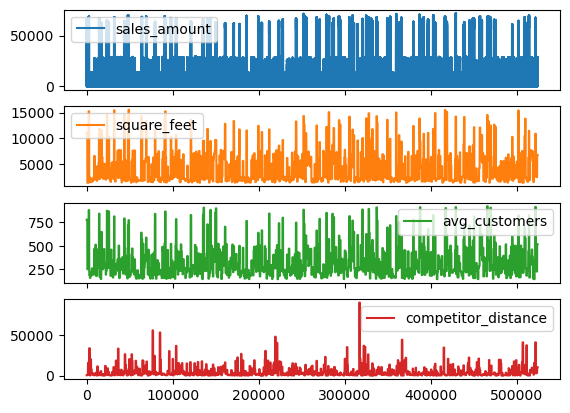

In [59]:
merged_df.plot(subplots=True)

These 4 plots are not very relevant, the only thing we can retain from it, is that "square_feet" and "avg_customers" seems to have some correlation.

##### We will now plot each predictor, with the target, in an attempt to find some relationship between them.

<Axes: xlabel='market_id', ylabel='sales_amount'>

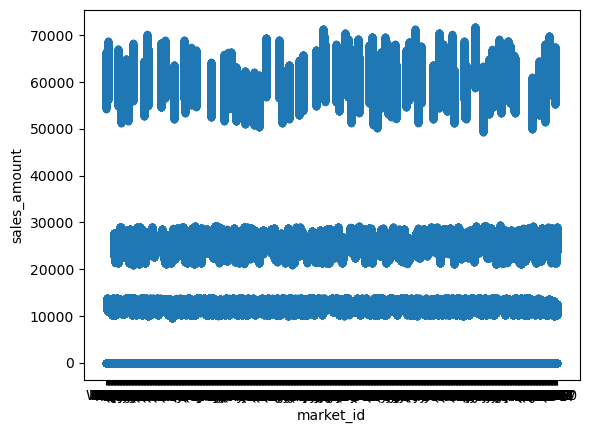

In [60]:
merged_df.plot(x="market_id",y="sales_amount",kind="scatter")

In this scatterplot of the "sales_amount" based on the "id", we can see the influence of the "market_type".

All the sales_amount equal to 0, are the days where the market are close. They are not relevant, because only the predictors "is_open" determine these values.

All the non 0 sales_amount are separated in three levels, each for a type of market. The higher one for the hypermarket, the one below for the supermarket and the last one for the minimarkets.

We can see that the three levels of sales_amount for the open days, are very well separated.

We can separate all the markets of differents types and generate again this graph, to show that each market, have all its positive sales on the same levels, because of its "market_type".

In [61]:
Hyper=merged_df[merged_df["market_type"]=="HYPER"]
Super=merged_df[merged_df["market_type"]=="SUPER"]
Mini=merged_df[merged_df["market_type"]=="MINI"]

<Axes: title={'center': 'minimarkets'}, xlabel='market_id', ylabel='sales_amount'>

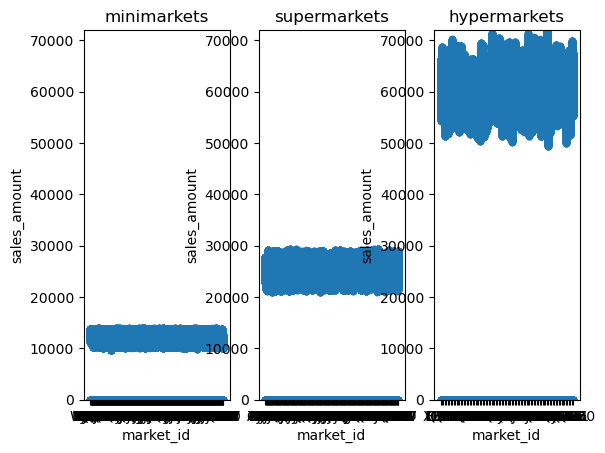

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=3)
Hyper.plot(x="market_id",y="sales_amount",kind="scatter",ax=axes[2],ylim=(0,72000),title="hypermarkets")
Super.plot(x="market_id",y="sales_amount",kind="scatter",ax=axes[1],ylim=(0,72000),title="supermarkets")
Mini.plot(x="market_id",y="sales_amount",kind="scatter",ax=axes[0],ylim=(0,72000),title="minimarkets")

We can observe that indeed the 3 levels are well correlated to the type of markets.

<Axes: xlabel='is_open', ylabel='sales_amount'>

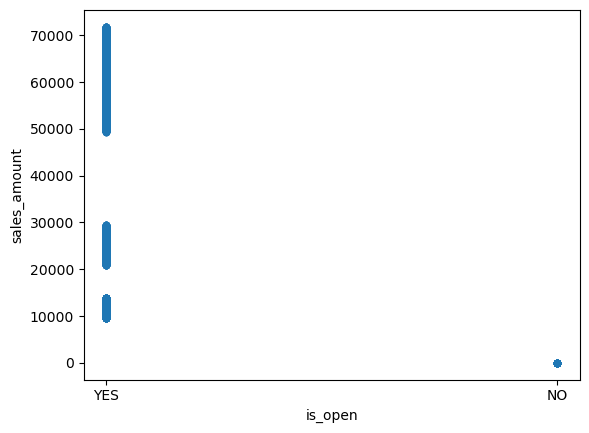

In [63]:
merged_df.plot(x="is_open",y="sales_amount",kind="scatter")

As said before, we can observe that there are sales, only if the markets are open, regardless its "market_type".

<Axes: xlabel='country', ylabel='sales_amount'>

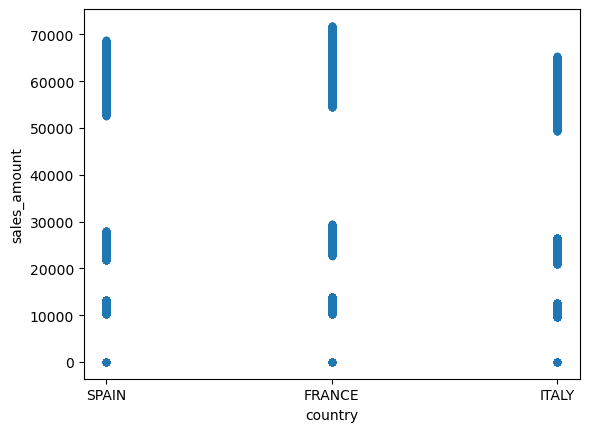

In [64]:
merged_df.plot(x="country",y="sales_amount",kind="scatter",secondary_y=True)

Even for each country, we can see that the type of the markets are significant, for the sales.

<Axes: title={'center': 'minimarkets'}, xlabel='country', ylabel='sales_amount'>

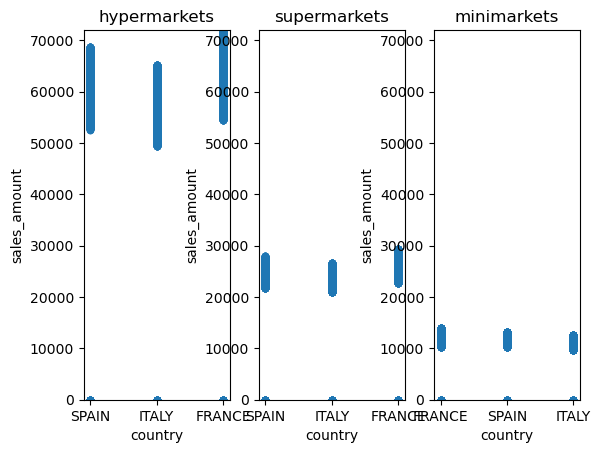

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=3)
Hyper.plot(x="country",y="sales_amount",kind="scatter",ax=axes[0],ylim=(0,72000),title="hypermarkets")
Super.plot(x="country",y="sales_amount",kind="scatter",ax=axes[1],ylim=(0,72000),title="supermarkets")
Mini.plot(x="country",y="sales_amount",kind="scatter",ax=axes[2],ylim=(0,72000),title="minimarkets")

Nevertheless, we can compare the sales of each type of markets, for each country.

For example, we see that for hypermarkets, the sales are a globally upper in France and globally lower in Italy.

For the supermarkets and the minimarkets, we can observe the same patterns.

<Axes: xlabel='has_promotions', ylabel='sales_amount'>

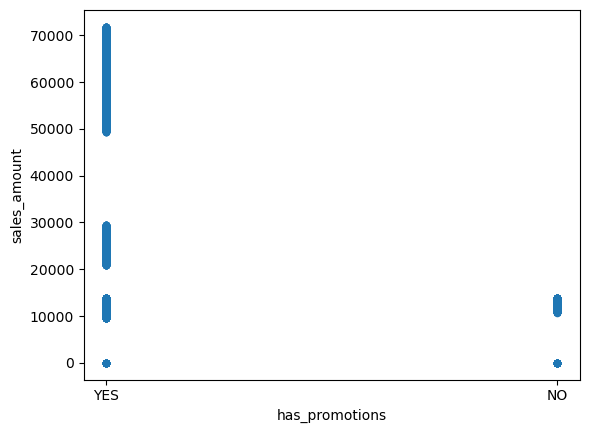

In [66]:
merged_df.plot(x="has_promotions",y="sales_amount",kind="scatter")

Thanks to this graph, we can only say that the market which has promotions make better sales, than those which hasn't.

But we can also see, that among all the sales of the markets with promotions, there are yet three well-separated levels. 
For the markets, which don't have promotions, we can observe only one non-zeros levels.

So we can assess that:
- the "market_type" is significant, to know if the market has promotions or not.
- the "market_type" is significant, to determine the amount of sales, even only among the markets which have promotions.

To check for this, we can generate the same graph, but for separated types of markets:

<Axes: title={'center': 'minimarkets'}, xlabel='has_promotions', ylabel='sales_amount'>

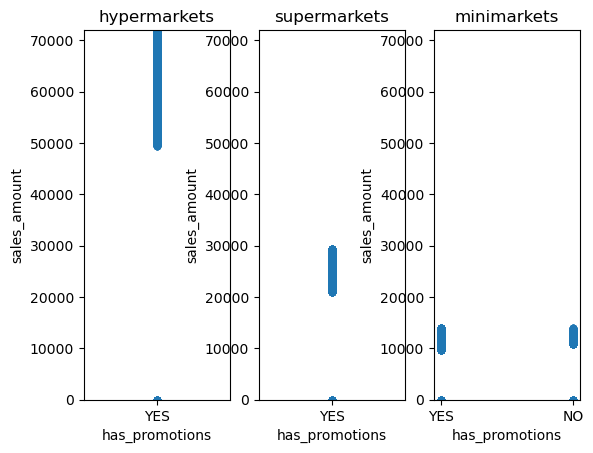

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=3)
Hyper.plot(x="has_promotions",y="sales_amount",kind="scatter",ax=axes[0],ylim=(0,72000),title="hypermarkets")
Super.plot(x="has_promotions",y="sales_amount",kind="scatter",ax=axes[1],ylim=(0,72000),title="supermarkets")
Mini.plot(x="has_promotions",y="sales_amount",kind="scatter",ax=axes[2],ylim=(0,72000),title="minimarkets")

Thanks to these graphs, we can see that our two previous assertion are relevant and that supermarkets and hypermarkets always have promotions, but not minimarkets.

<Axes: xlabel='competitor_distance', ylabel='sales_amount'>

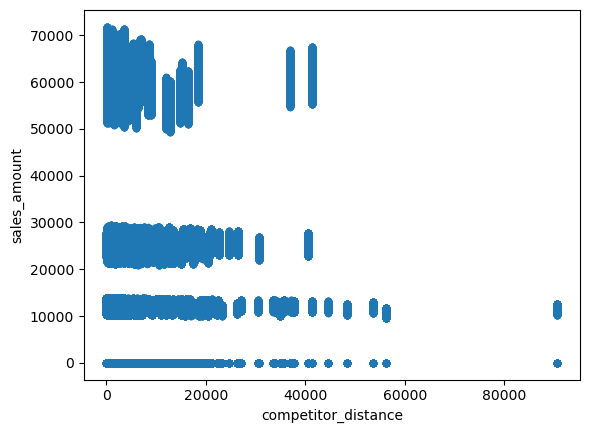

In [68]:
merged_df.plot(x="competitor_distance",y="sales_amount",kind="scatter")

For all data, the market stay at the same distance to its nearest competitor. So for the same market, we can see only vertically, the differences of "sales_amount", among the days. We can see across the three well separated levels, that this variations among the days, stay strongly legated to the type of the market. But we will check this, with others graphs.

We can also observe that bigger the competitor distance is, the scarcer the data. It's natural, because it is increasingly difficult to be away from competitors.

<Axes: title={'center': 'minimarkets'}, xlabel='competitor_distance', ylabel='sales_amount'>

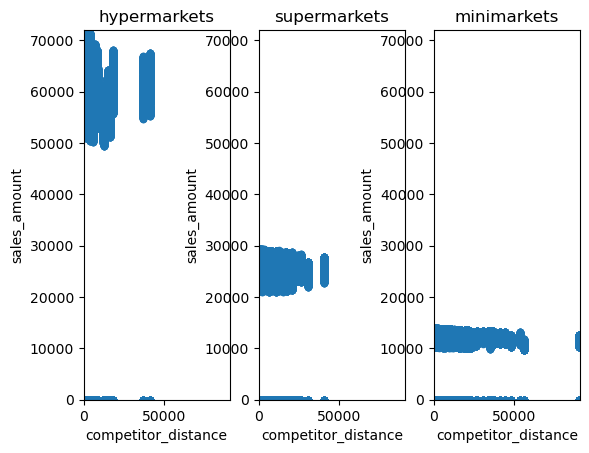

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=3)
Hyper.plot(x="competitor_distance",y="sales_amount",kind="scatter",ax=axes[0],xlim=(0,91000),ylim=(0,72000),title="hypermarkets")
Super.plot(x="competitor_distance",y="sales_amount",kind="scatter",ax=axes[1],xlim=(0,91000),ylim=(0,72000),title="supermarkets")
Mini.plot(x="competitor_distance",y="sales_amount",kind="scatter",ax=axes[2],xlim=(0,91000),ylim=(0,72000),title="minimarkets")

These graphs confirm that "market_type" is relevant, for the sales of markets, even regarding their "competitor_distance".

We can observe that hypermarkets are separated in 2 groups, by the competitor distance. One group with the lower competitor distance (under 25Km) and a bigger variance in the sales amounts and the second smaller group, with bigger competitor distance, but lower variations on their sales amounts.

We can also observe two groups yet separated by competitor distance, for supermarkets and minimarkets.
Always with one bigger group, with lower competitor distance (under 38Km for super and under 55Km for mini) and bigger variations on the sales amounts. A variation which seems to reduce, as the competitor distance increase. And a second smaller group, with bigger competitor distance, but lower variations on their sales amounts. 

For the three types of markets, we could assess that these second smaller groups are **outliers**.

<Axes: xlabel='avg_customers', ylabel='sales_amount'>

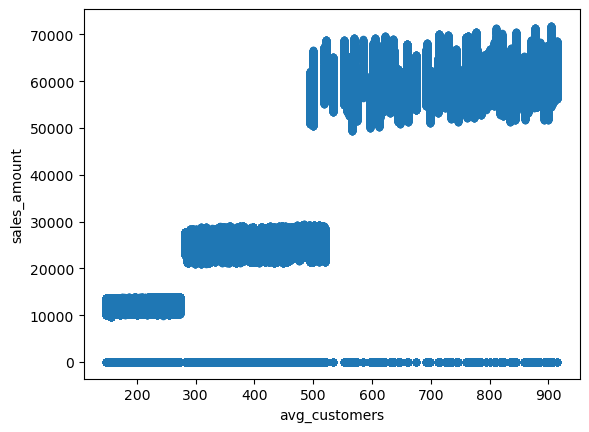

In [70]:
merged_df.plot(x="avg_customers",y="sales_amount",kind="scatter")

Even if again, the "market_type" is still visible in this graph also, with the three differents levels. There is one interesting thing to note.

It's that the three different levels are well separated on "sales_amount", but not on "avg_customers". Indeed, we can find supermarkets and minimarkets, with differents sales amounts, but with the same or very close "avg_customers".

Even more interesting, we can also find hypermarkets datas with lower "avg_customers", than some supermarkets, regardless that there "sales_amount" are bigger.

These observations tend to indicate, that "avg_customers" is more significant, in order to determine "sales_amount", because this variable is less correlated to the variable "market_type", so it brings new informations, for learning.

We can also notice that for all "avg_customers" values, supermarkets and minimarkets have very stable "sales_amount" variations, while hypermarkets have more fluctuant "sales_amount" variations. 

We can partially explain it, because of the fact that the retail company have less hypermarkets, so less dats on them. We can also have in mind that in hypermarkets, the choice of products is bigger, so the variation in customer purchases is greater.

<Axes: title={'center': 'minimarkets'}, xlabel='avg_customers', ylabel='sales_amount'>

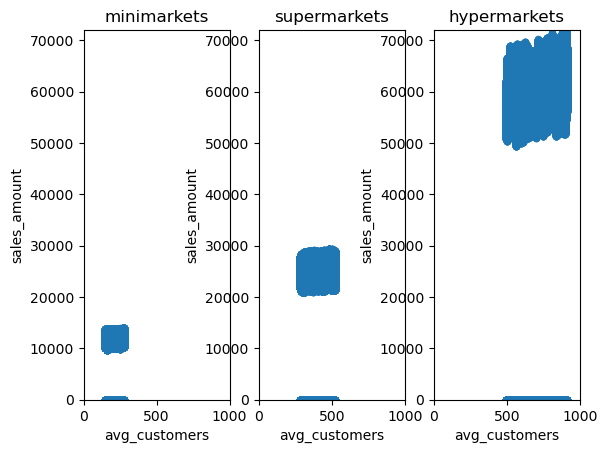

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=3)
Hyper.plot(x="avg_customers",y="sales_amount",kind="scatter",ax=axes[2],xlim=(0,1000),ylim=(0,72000),title="hypermarkets")
Super.plot(x="avg_customers",y="sales_amount",kind="scatter",ax=axes[1],xlim=(0,1000),ylim=(0,72000),title="supermarkets")
Mini.plot(x="avg_customers",y="sales_amount",kind="scatter",ax=axes[0],xlim=(0,1000),ylim=(0,72000),title="minimarkets")

These graphs allows us to see, that even if it is less correlated to "market_type" than other predictors, "avg_customers" depends always of this variable.

<Axes: xlabel='square_feet', ylabel='sales_amount'>

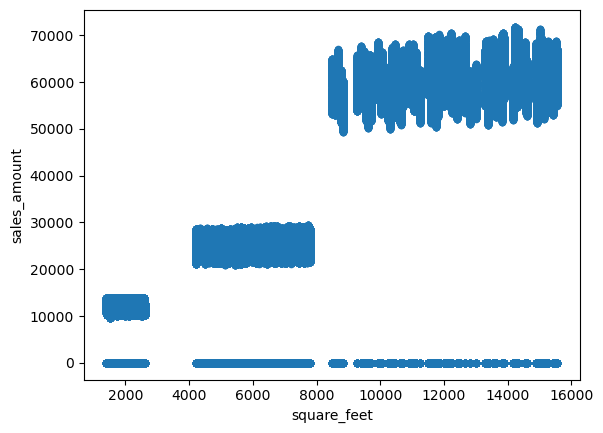

In [72]:
merged_df.plot(x="square_feet",y="sales_amount",kind="scatter")

We also find the influence of "market_type" in the relationship between "square_feet" and "sales_amount", because "square_feet" datas are perfectly clustered by "market_type" labels.

Like for "avg_customers", we can see that supermarkets and minimarkets have less variatibility on "sales_amount", regarding to "square_feet" and hypermarkets have also more  fluctuant variations.

In contrast to "avg_customers", the three different levels induced by "market_type" are perfectly separated on "sales_amount" and also "square_feet", because the "square_feet" is more strongly correlated to "market_type", than "avg_customers".

<Axes: title={'center': 'minimarkets'}, xlabel='square_feet', ylabel='sales_amount'>

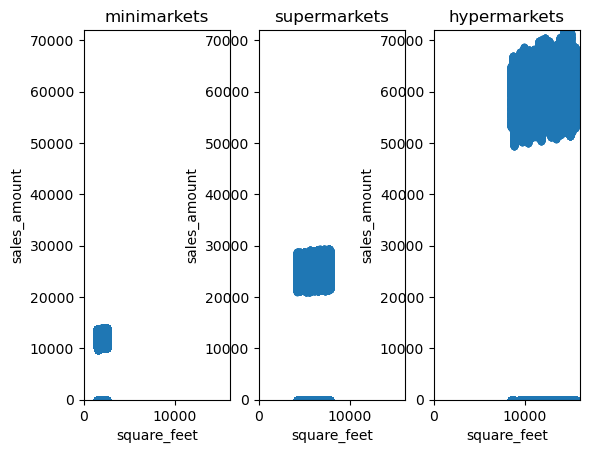

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=3)
Hyper.plot(x="square_feet",y="sales_amount",kind="scatter",ax=axes[2],xlim=(0,16000),ylim=(0,72000),title="hypermarkets")
Super.plot(x="square_feet",y="sales_amount",kind="scatter",ax=axes[1],xlim=(0,16000),ylim=(0,72000),title="supermarkets")
Mini.plot(x="square_feet",y="sales_amount",kind="scatter",ax=axes[0],xlim=(0,16000),ylim=(0,72000),title="minimarkets")

To be sure, that its these tree groups of datas are legated to the value of "market_type".

On the next graph, we look at the relationship between predictors. For these predictors the value stay the same, for all datas on the same market, so each point on these graphs are a market.

<Axes: xlabel='square_feet', ylabel='avg_customers'>

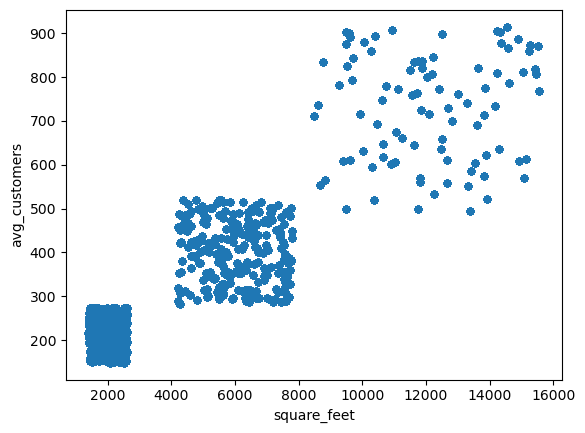

In [74]:
merged_df.plot(x="square_feet",y="avg_customers",kind="scatter")

We can see that "avg_customers" and "square_feet" are strongly legated to "market_type", but for the same type of market, there are no clear relationship between the size and the attendance of the market. It seems to be randomly uniform.

<Axes: title={'center': 'minimarkets'}, xlabel='square_feet', ylabel='avg_customers'>

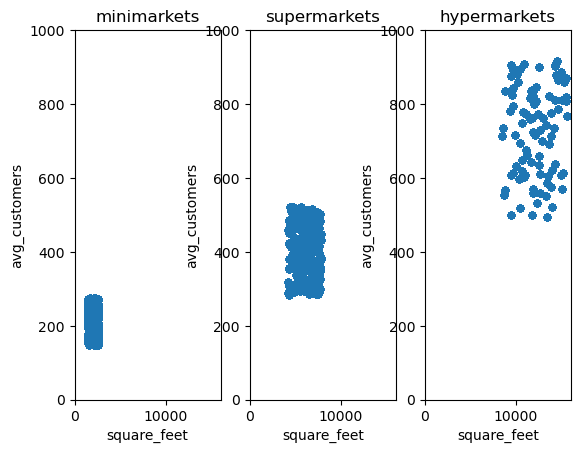

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=3)
Hyper.plot(x="square_feet",y="avg_customers",kind="scatter",ax=axes[2],xlim=(0,16000),ylim=(0,1000),title="hypermarkets")
Super.plot(x="square_feet",y="avg_customers",kind="scatter",ax=axes[1],xlim=(0,16000),ylim=(0,1000),title="supermarkets")
Mini.plot(x="square_feet",y="avg_customers",kind="scatter",ax=axes[0],xlim=(0,16000),ylim=(0,1000),title="minimarkets")

To check, if the groups are resulting of "market_type" influence.

<Axes: xlabel='square_feet', ylabel='competitor_distance'>

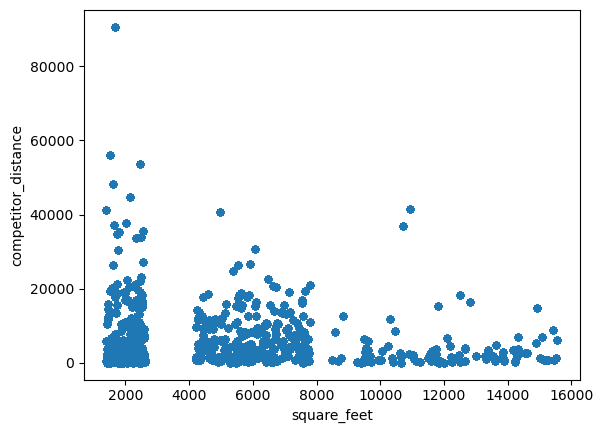

In [76]:
merged_df.plot(x="square_feet",y="competitor_distance",kind="scatter")

In this graph, only "square_feet" allows to distinguish the market types. We can observe that the size of the "square_feet" values intervals for minimarket, supermarket and hypermarkets is increasing, with the type of market. But it can also being explained, by the fact that we have less hypermarkets, than supermarkets and minimarkets.

But, in the same time, the variations of competitor distance are more tighter to 0, when the size in "square_feet" and so type of market, is increasing.

We could assess that the two hypermarkets and one minimarket, with very higher competitor distance are **outliers**.

<Axes: title={'center': 'minimarkets'}, xlabel='square_feet', ylabel='competitor_distance'>

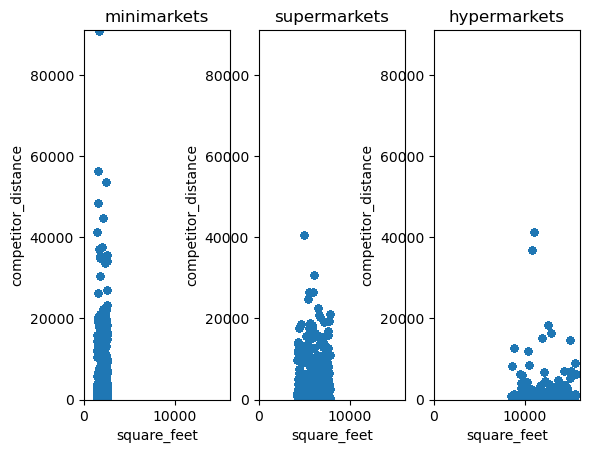

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=3)
Hyper.plot(x="square_feet",y="competitor_distance",kind="scatter",ax=axes[2],xlim=(0,16000),ylim=(0,91000),title="hypermarkets")
Super.plot(x="square_feet",y="competitor_distance",kind="scatter",ax=axes[1],xlim=(0,16000),ylim=(0,91000),title="supermarkets")
Mini.plot(x="square_feet",y="competitor_distance",kind="scatter",ax=axes[0],xlim=(0,16000),ylim=(0,91000),title="minimarkets")

To check, if the previous observations are well resulting of "market_type" influence.

<Axes: xlabel='avg_customers', ylabel='competitor_distance'>

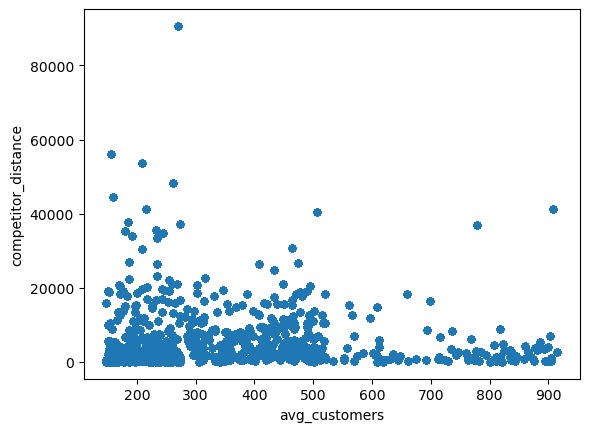

In [78]:
merged_df.plot(x="avg_customers",y="competitor_distance",kind="scatter")

Now, as seen before with "avg_customers" variable, the separation between the types of markets is more difficult in this graph.

But we can also observe that the fluctuations of "competitor_distance" values are globally decreasing, when the attendance of the market is increasing.

We see always two potentials hypermarkets outliers, with very big competitor distance, for a big attendance "avg_customers" values and maybe one, supermarket outlier and one minimarket outlier.

<Axes: title={'center': 'minimarkets'}, xlabel='avg_customers', ylabel='competitor_distance'>

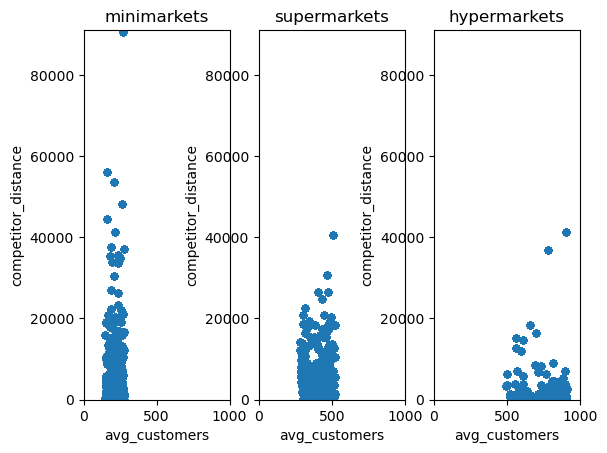

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=3)
Hyper.plot(x="avg_customers",y="competitor_distance",kind="scatter",ax=axes[2],xlim=(0,1000),ylim=(0,91000),title="hypermarkets")
Super.plot(x="avg_customers",y="competitor_distance",kind="scatter",ax=axes[1],xlim=(0,1000),ylim=(0,91000),title="supermarkets")
Mini.plot(x="avg_customers",y="competitor_distance",kind="scatter",ax=axes[0],xlim=(0,1000),ylim=(0,91000),title="minimarkets")

#### To resume:

We can say that the predictor "market_type" is major on sales_amount, because many of the features of markets are correlated to this one.

The variables "square_feet","competitor_distance","avg_customers","id" and "country" are more or less strongly legated to the predictor "market_type", regarding sales amounts.

The predictor "avg_customers" is more significant, in order to determine "sales_amount", because this variable is less correlated to the variable "market_type", so it brings new informations, for learning.

The variable "is_open" is only significant, to explain the sales amount equal to 0 on datas.

The variable "has_promotions" is relevant, on the sales amount, only across "market_type". If the market don't have promotions, we know that its a minimarkets, so we could assess the level of its sales amounts.

The variable "competitor distance" allow us, to assess that markets with the biggest competitor distance, for each type of market, could be outliers.
We find in particular two hypermarkets and one minimarkets, which could are good candidate, to be **outliers**.

To better see, the "market_type" influence leading the previous observations.

In [80]:
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning) # this commands is just to avoid to have a message for a future warnings

Now to visualize our merged dataframe, we are going to make several displays.

In particular boxplot for the numerical columns , countplot for the categorical columns and histplot to get an other idea of the distribution of our variables.

To start the visualization we can display a countplot for each categorical variable because this allows you to get an idea on the number of each market_type and also what country is the most represented in the dataset :

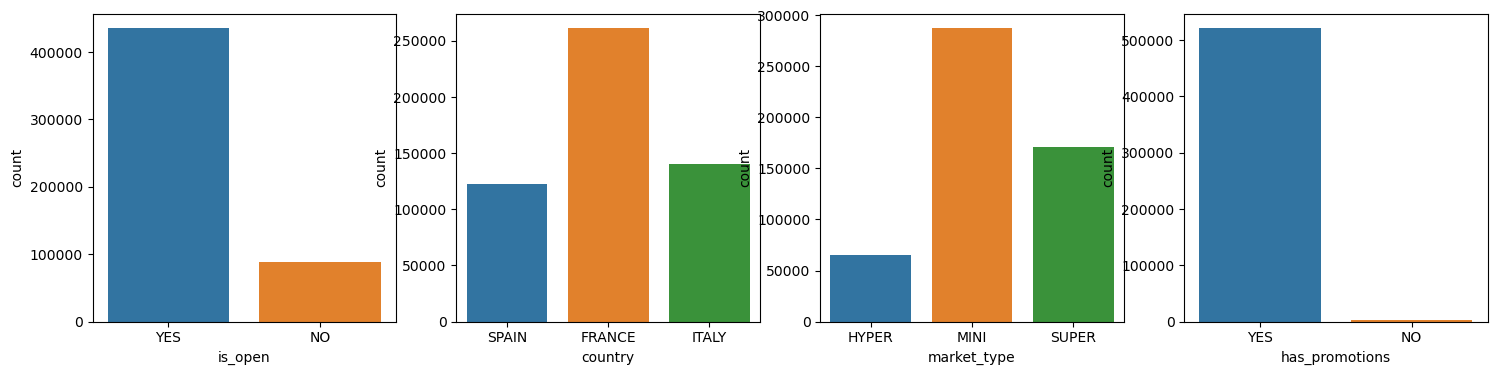

In [81]:
interested_columns = ["is_open","country","market_type","has_promotions"] # here we create a list with all categorical columns

fig, ax = plt.subplots(ncols=4,figsize=(18,4))
index = 0
ax = ax.flatten()
for col in interested_columns:
    sns.countplot(x=col, data=merged_df, ax=ax[index]) # we use the countplot method from seaborn
    index += 1

From this countplot of categorical variable we can make some conclusions and hypothesis :
- First, we can see that in our merged_df for the column "is_open" there are near 100K data points where the market is close, so for this data points our target "sales_amount" must to be zero and thus we can make an interrogation if this predictor is useful for the prediction (we see it later).

- Second, we can clearly see that France is the country the most represented with more than 250K data points. After we have Italy and Spain below 150K data points.

- Third, concerning the "market_type" we can see that there are much more "MINI" data points than the others ("HYPER","SUPER"). In particluar, there are 4 times more "MINI" (287352) than "HYPER" (65320) and 1.5 times more than "SUPER" (171276). We have to keep this idea moreover this predictor can be useful in theory because it seems logical that the size of a market influence the "sales_amount". 

- Fourth, for the column "has_promotions" we can see a huge number of data points (>500K) has promotions, so we can also ask the question if it's predictor is relevant or not.

In particular, for market_type it could be interesting to have the countplot of this variable with respect to country.

<Axes: xlabel='market_type', ylabel='count'>

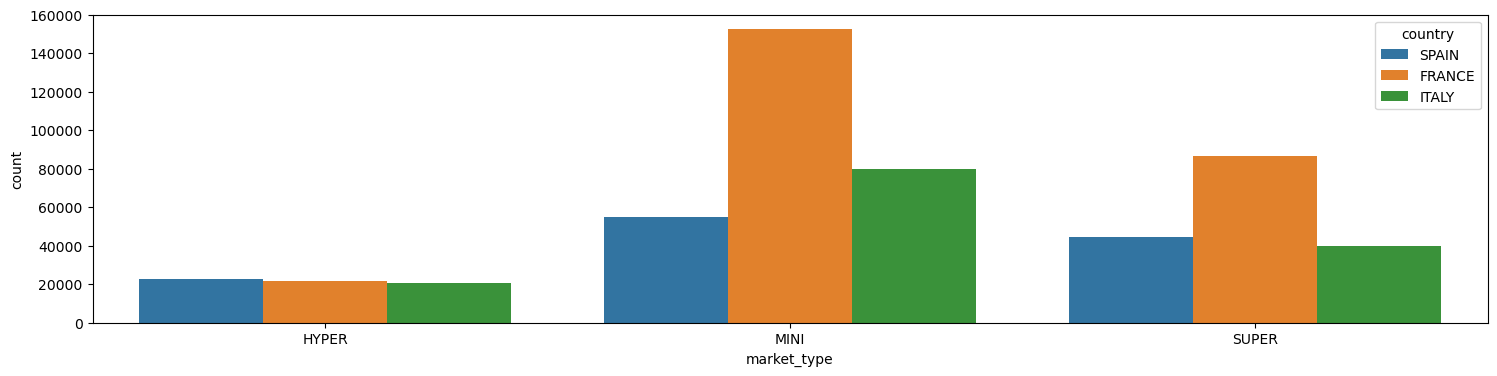

In [82]:
fig, ax = plt.subplots(ncols=1,figsize=(18,4))
sns.countplot(x="market_type",hue="country",data=merged_df,ax=ax) # we use the parameter "hue" to realize the countplot with respect to our interested variable

Althought there are much more France data points, we can see effictively that there are more France "MINI" and France "SUPER" than the others but we can see there is more Spain "HYPER" than France or Italy which let understand that country variable has a impact and can also be a useful predictor.

Now, we would also visualize the numerical data and in this way we can create a dataframe which contains only numerical variables of merged_df : 

In [83]:
merged_numeric__columns = merged_df[["sales_amount","square_feet","avg_customers","competitor_distance"]] # we create a new dataset which contains only numerical data
merged_numeric__columns

,sales_amount,square_feet,avg_customers,competitor_distance
0,55727.34,11135,773.0,515
1,0.00,11135,773.0,515
2,58708.78,11135,773.0,515
3,63651.35,11135,773.0,515
4,65172.42,11135,773.0,515
...,...,...,...,...
523929,25417.78,6806,516.0,10468
523930,0.00,6806,516.0,10468
523931,27687.06,6806,516.0,10468
523932,26627.14,6806,516.0,10468


We can display the histplot for each numerical variable to visualize curve trend.

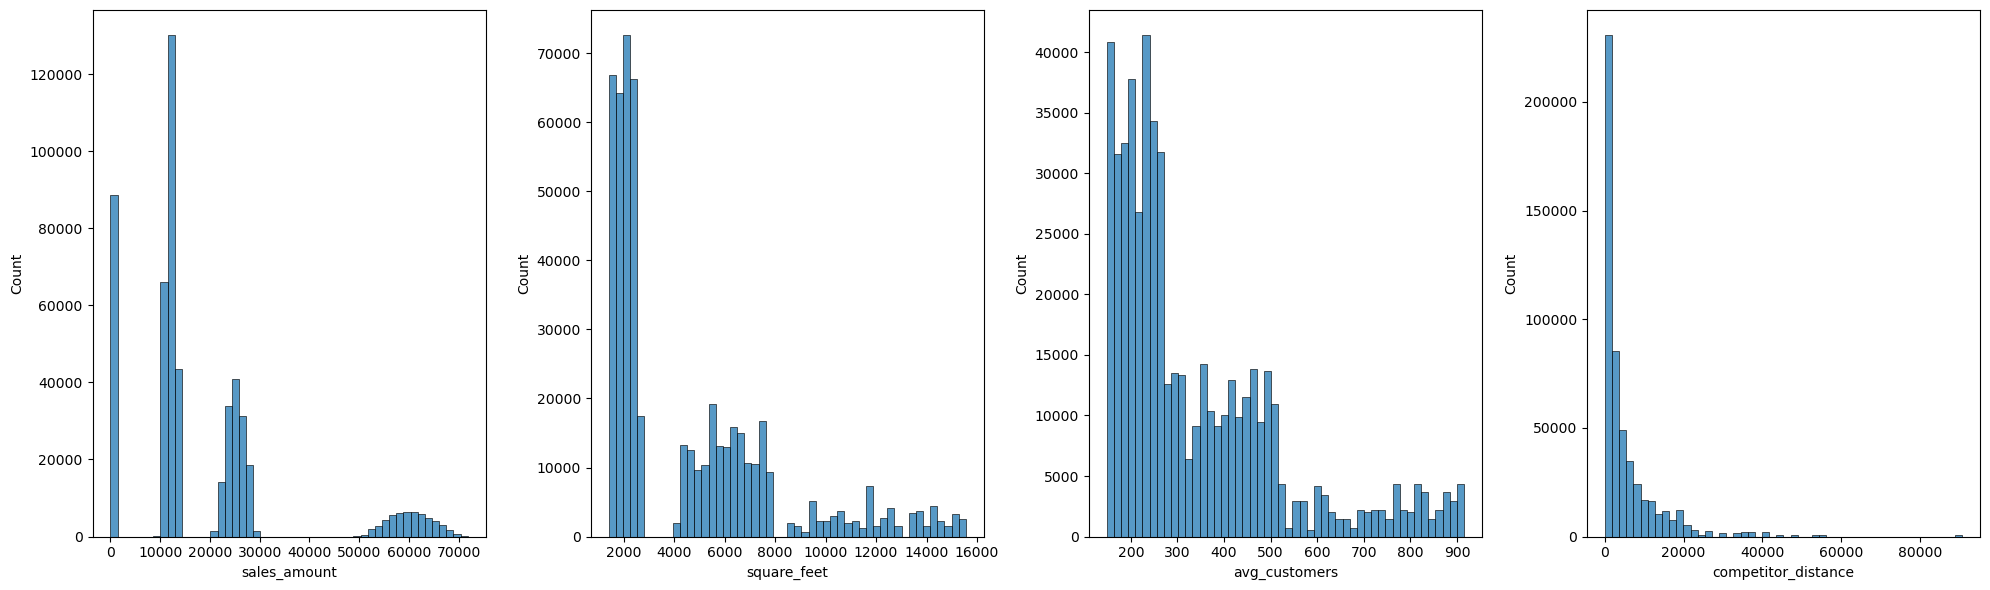

In [84]:
fig, ax = plt.subplots(ncols=4, figsize=(20,6))
index = 0
ax = ax.flatten()
for k, v in merged_numeric__columns.items():
    sns.histplot(data=merged_df,x=k,bins=50,ax=ax[index]) # we use the histplot method of seaborn to visualize curve trend
    index +=1
plt.tight_layout()

Is it maybe more useful to display histplot group by "market_type" because on the above histplot we can see seperate data expect for the hisplot "competitor_distance".

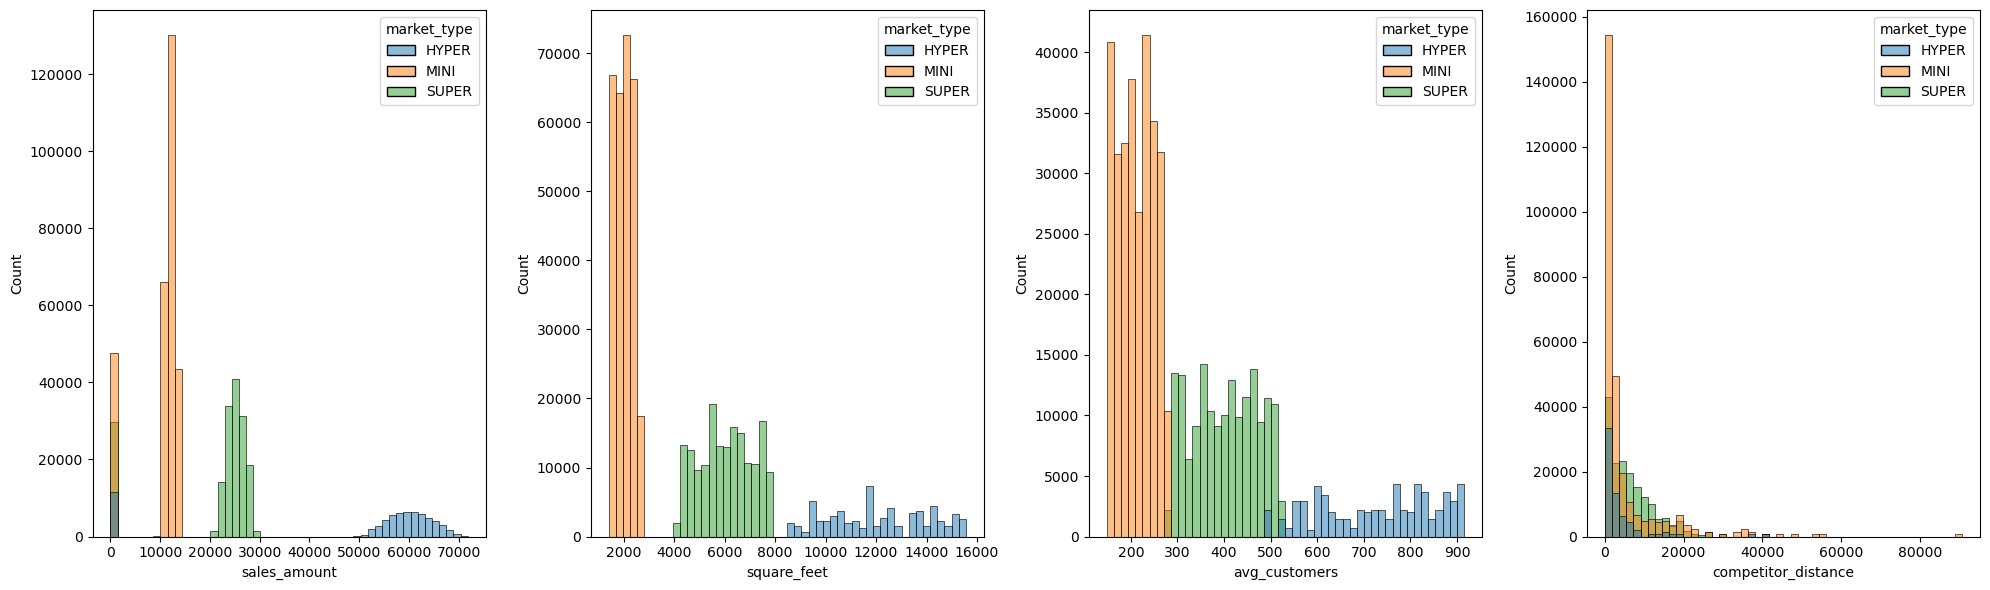

In [85]:
fig, ax = plt.subplots(ncols=4, figsize=(20,6))
index = 0
ax = ax.flatten()
for k, v in merged_numeric__columns.items():
    sns.histplot(data=merged_df,x=k,hue="market_type",bins=50,ax=ax[index]) # we use the histplot method of seaborn to visualize curve trend
    index +=1
plt.tight_layout()

In fact it is really more relevant for the visualization and we can make the conjecture that "sales_amount","square_feet","avg_customers" are high-correlated with the "market_type".

We can show a boxplot of numerical columns to visualize the data and possible outliers

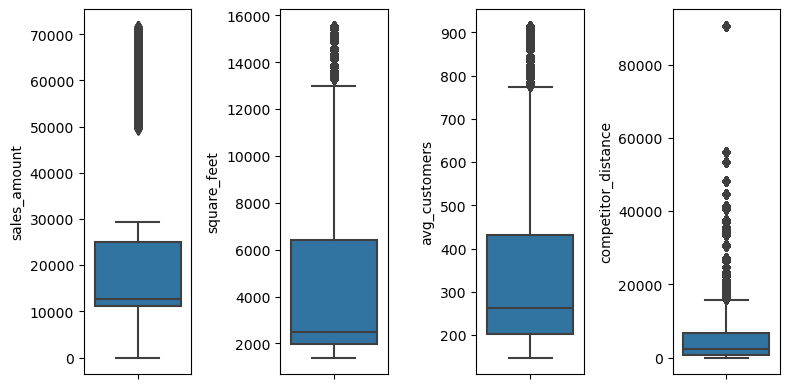

In [86]:
fig, ax = plt.subplots(ncols=4, figsize=(8,4))
index = 0
ax = ax.flatten()
for k, v in merged_numeric__columns.items():
    sns.boxplot(y=k, data=merged_df, ax=ax[index]) # we use the boxplot method of seaborn to visualize the data, the points in black are the outliers.
    index +=1
plt.tight_layout()

It seems there are some outliers, let's see the outlier percentage per column

We see in Lab 1 that to check outliers (before fitting the model), one standard approach is to compute the IQR (interquartile range) and then check values that are 
- lower than quantile(0.25) - 1.5IQR or
- greater than quantile(0.75) + 1.5IQR

In [87]:
for k, v in merged_numeric__columns.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3-q1
    outliers_v = v[(v <= q1 - 1.5*iqr) | (v >= q3 + 1.5*iqr)]
    print(f"The column {k} has {round(len(outliers_v)/len(v) * 100, 2)}% outliers")

The column sales_amount has 10.28% outliers
The column square_feet has 4.28% outliers
The column avg_customers has 5.26% outliers
The column competitor_distance has 8.84% outliers


Take a look on possible outliers

True outliers ?

We can thought there are lot of outliers for each numerical column and these outliers lies on the high values for all predictors.
 
But are not possible that a part of these outliers are just link to the fact that there are much more "SUPER" and "MINI" market with low values and so the boxplot be levelled down ?

Let's check it

In [88]:
# we can create sub-dataframes group by "market_type"
merged_numeric__columns_hyper = merged_df[merged_df["market_type"]=="HYPER"]  
merged_numeric__columns_super = merged_df[merged_df["market_type"]=="SUPER"]
merged_numeric__columns_mini = merged_df[merged_df["market_type"]=="MINI"]

We can show a boxplot of numerical columns group by "market_type" to visualize the data and possible outliers.

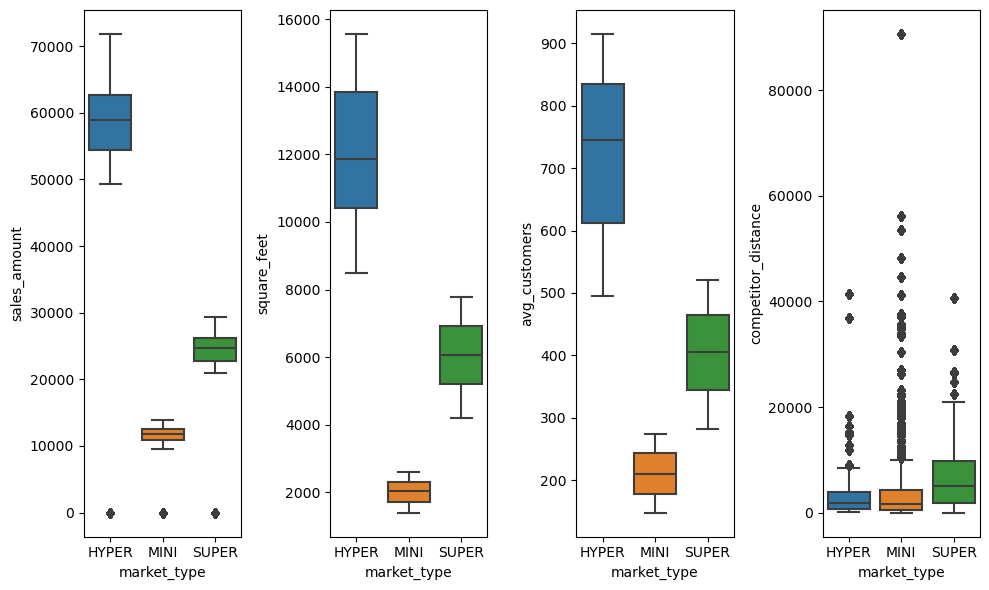

In [89]:
fig, ax = plt.subplots(ncols=4, figsize=(10,6))
index = 0
ax = ax.flatten()
indicator = "market_type"
for k, v in merged_numeric__columns.items():
    sns.boxplot(data=merged_df, x=indicator, y=k,ax=ax[index])# we use the boxplot method of seaborn to visualize the data, the points in black are the outliers.
    index +=1
plt.tight_layout()

In [90]:
list_market_type = [("MINI",merged_numeric__columns_mini),("SUPER",merged_numeric__columns_super),("HYPER",merged_numeric__columns_hyper)]
for i,df in list_market_type:
    print("Dataframe : ", i)
    for k, v in df[merged_numeric__columns.columns].items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        iqr = q3-q1
        outliers_v = v[(v <= q1 - 1.5*iqr) | (v >= q3 + 1.5*iqr)]
        print(f"The column {k} has {round(len(outliers_v)/len(v) * 100, 2)}% outliers")

Dataframe :  MINI
The column sales_amount has 16.55% outliers
The column square_feet has 0.0% outliers
The column avg_customers has 0.0% outliers
The column competitor_distance has 15.3% outliers
Dataframe :  SUPER
The column sales_amount has 17.29% outliers
The column square_feet has 0.0% outliers
The column avg_customers has 0.0% outliers
The column competitor_distance has 2.45% outliers
Dataframe :  HYPER
The column sales_amount has 17.51% outliers
The column square_feet has 0.0% outliers
The column avg_customers has 0.0% outliers
The column competitor_distance has 9.78% outliers


### Handling outliers
We can clearly see that indeed these are false outliers for the high-values for "sales_amount","square_feet","avg_customers". For "sales_amount" we have for each "market_type" near 17 % of outliers, these values corresponding when the market is close and so "sales_amount" is equal to zero. This column "is_open" is clearly useless for the prediction of "sales_amount" because it does not give relevant information for sales amount if it is close => sales amount is equal to 0 and if is open we just know that sales amount >0 but we can't have a accurate idea of this value. The goal of our analysis is to try to predict the sales amount of a market on openning days.

So now we have two options :
 
 1) We don't do anything and we leave unchanged.
 2) We remove the line which have sales amount equal to zero and then we remove the column "is_open".

We choose the second option

In [91]:
merged_df = merged_df[merged_df["sales_amount"]>0].reset_index(drop=True)
merged_df = merged_df.drop(columns="is_open")
merged_df

,market_id,sales_amount,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions
0,XC14,55727.34,SPAIN,HYPER,11135,773.0,515,YES
1,XC14,58708.78,SPAIN,HYPER,11135,773.0,515,YES
2,XC14,63651.35,SPAIN,HYPER,11135,773.0,515,YES
3,XC14,65172.42,SPAIN,HYPER,11135,773.0,515,YES
4,XC14,56635.94,SPAIN,HYPER,11135,773.0,515,YES
...,...,...,...,...,...,...,...,...
435305,QD17,26552.21,FRANCE,SUPER,6806,516.0,10468,YES
435306,QD17,25417.78,FRANCE,SUPER,6806,516.0,10468,YES
435307,QD17,27687.06,FRANCE,SUPER,6806,516.0,10468,YES
435308,QD17,26627.14,FRANCE,SUPER,6806,516.0,10468,YES


From the above boxplot display we can clearly see that "competitor_distance" has a important number of outliers in the high values. 

    "The column competitor_distance has 8.71% outliers"

Now, we have two options :

1) Replace the outliers by the upper bound

2) Leave unchanged and fit with outliers

We choose the first options and we replace values by the upper bound of competitor distance to avoid to remove again data from our dataset

<Axes: >

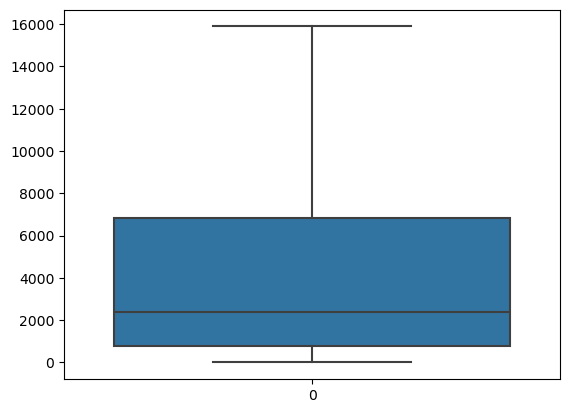

In [92]:
q1,q3 =merged_df["competitor_distance"].quantile([0.25,0.75])
iqr = q3-q1
upper_bound = q3 + 1.5*iqr

index_outliers = merged_df[(merged_df["competitor_distance"] >= upper_bound)].index
merged_df.loc[index_outliers,"competitor_distance"] = upper_bound
sns.boxplot(merged_df["competitor_distance"])

## Encoding categorical variables:

Before fitting Linear model we have to encode categorical variable. There are several type of categorical variable especially "nominal" variable and "ordinal" variable.

- Nominal: Used to categorize data into mutually exclusive categories or groups which do not have an inherent order.
- Ordinal: Used to measure variables in a natural order, such as rating or ranking

> Source : Definitions(Nominal/Ordinal) from Medium website.

We have 5 categorical variables :  "marked_id","is_open","country","market_type","has_promotions". 

- The column "market_id" is not relevant and we will not use this variable for our prediction.

- The column "is_open","has_promotions","country" are Nominal variables. 

    - "is_open" and "has_promotions contains only two values "YES" and "NO" so it's seems logical to mapping this values with respectively values 1 and 0.

    - "country" contains three values ["FRANCE","SPAIN","ITALY"] but there is no order is these values a priori so one of the most common method for encoding Categorical variables is applied One-Hot Encoding which means create a binary column for each unique category (and drop the first column for the dummy encoding).

- The column "market_type" is a Ordinal variable. We have "MINI"<"SUPER"<"HYPER" so we seems logical to mapping the variable to respectively [0,1,2].

We create a copy df_encoded from merge_df :

In [93]:
df_encoded = merged_df.copy()
df_encoded

,market_id,sales_amount,country,market_type,square_feet,avg_customers,competitor_distance,has_promotions
0,XC14,55727.34,SPAIN,HYPER,11135,773.0,515.0,YES
1,XC14,58708.78,SPAIN,HYPER,11135,773.0,515.0,YES
2,XC14,63651.35,SPAIN,HYPER,11135,773.0,515.0,YES
3,XC14,65172.42,SPAIN,HYPER,11135,773.0,515.0,YES
4,XC14,56635.94,SPAIN,HYPER,11135,773.0,515.0,YES
...,...,...,...,...,...,...,...,...
435305,QD17,26552.21,FRANCE,SUPER,6806,516.0,10468.0,YES
435306,QD17,25417.78,FRANCE,SUPER,6806,516.0,10468.0,YES
435307,QD17,27687.06,FRANCE,SUPER,6806,516.0,10468.0,YES
435308,QD17,26627.14,FRANCE,SUPER,6806,516.0,10468.0,YES


In [94]:
df_encoded["market_type"] = df_encoded["market_type"].map({"MINI": 0, "SUPER": 1, "HYPER": 2})

df_encoded["has_promotions"] = df_encoded["has_promotions"].map({"NO": 0, "YES": 1})

df_encoded.drop(columns="market_id")

# Use get_dummies() function for dummy encoding

df_encoded=pd.get_dummies(data=df_encoded, columns=["country"],drop_first=False)

df_encoded = df_encoded.rename(columns={"country_ITALY":"ITALY","country_SPAIN":"SPAIN","country_FRANCE":"FRANCE"})

df_encoded

,market_id,sales_amount,market_type,square_feet,avg_customers,competitor_distance,has_promotions,FRANCE,ITALY,SPAIN
0,XC14,55727.34,2,11135,773.0,515.0,1,False,False,True
1,XC14,58708.78,2,11135,773.0,515.0,1,False,False,True
2,XC14,63651.35,2,11135,773.0,515.0,1,False,False,True
3,XC14,65172.42,2,11135,773.0,515.0,1,False,False,True
4,XC14,56635.94,2,11135,773.0,515.0,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...
435305,QD17,26552.21,1,6806,516.0,10468.0,1,True,False,False
435306,QD17,25417.78,1,6806,516.0,10468.0,1,True,False,False
435307,QD17,27687.06,1,6806,516.0,10468.0,1,True,False,False
435308,QD17,26627.14,1,6806,516.0,10468.0,1,True,False,False


### Multilinear Regression

Now, we can fit our multilinear model and see the different relathionship between predictors and target.

We use as predictors the following columns:
1) as predictors : 
    - "market_type"
    - "square_feet"
    - "avg_customers"
    - "competitor_distance"
    - "has_promotions"
    - "FRANCE"
    - "ITALY"
    - "SPAIN"
2) as target "sales_amount".

In [95]:
# Names of predictors and target columns 
predictors = ["square_feet","avg_customers","competitor_distance","FRANCE","ITALY","SPAIN","market_type","has_promotions"]
target = "sales_amount"

In [96]:
# Select predictors and target
X = df_encoded[predictors]
y = df_encoded[target]

It's useful to get use to normalize data before fitting to have data at the same scale.

There are several kind of normalization in particular :

    - StandardScaler() 
    - MinMaxScaler() 

In the Lab we used to choose StandardScaler() because our data look like more or less Gaussian distribution and so StandardScaler() which Standardize features by removing the mean and scaling to unit variance is very relevant.

Here our numerical data don't follow a Gaussian distribution and we rather choose MinMaxScaler() for Normalization.

In the following we reused the code see in the Lab 1

In [97]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled 

,square_feet,avg_customers,competitor_distance,FRANCE,ITALY,SPAIN,market_type,has_promotions
0,0.68750,0.814863,0.032415,0.0,0.0,1.0,1.0,1.0
1,0.68750,0.814863,0.032415,0.0,0.0,1.0,1.0,1.0
2,0.68750,0.814863,0.032415,0.0,0.0,1.0,1.0,1.0
3,0.68750,0.814863,0.032415,0.0,0.0,1.0,1.0,1.0
4,0.68750,0.814863,0.032415,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
435305,0.38178,0.479791,0.658883,1.0,0.0,0.0,0.5,1.0
435306,0.38178,0.479791,0.658883,1.0,0.0,0.0,0.5,1.0
435307,0.38178,0.479791,0.658883,1.0,0.0,0.0,0.5,1.0
435308,0.38178,0.479791,0.658883,1.0,0.0,0.0,0.5,1.0


In [98]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# split between X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,shuffle=True,random_state=999) # here the parameter shuffle is important because our data are initially sorted by market_id

# Add a constant for the intercept to both, training and test data
X_train_with_intercept = sm.add_constant(X_train)
X_test_with_intercept = sm.add_constant(X_test)

# Fit the linear regression model
model = sm.OLS(y_train, X_train_with_intercept).fit()

In [99]:
# before confidence intervals, let's see the prediction of y_test

y_pred = model.predict(X_test_with_intercept)
results_df = pd.DataFrame({'Actual (y_test)': y_test, 'Predicted (y_pred)': y_pred}).reset_index(drop=True)
results_df

,Actual (y_test),Predicted (y_pred)
0,24470.15,30150.228464
1,53839.09,43037.910334
2,11677.28,12841.197644
3,13459.24,11393.794127
4,13589.43,11565.569307
...,...,...
87057,11516.57,11239.591478
87058,26871.27,33287.758303
87059,13047.37,13256.549547
87060,54318.78,48183.201373


We can also vizualize the results with a histogram to get an idea on the accuracy of the prediction.

[Text(0.5, 1.0, 'Visualization of y_test/y_pred results')]

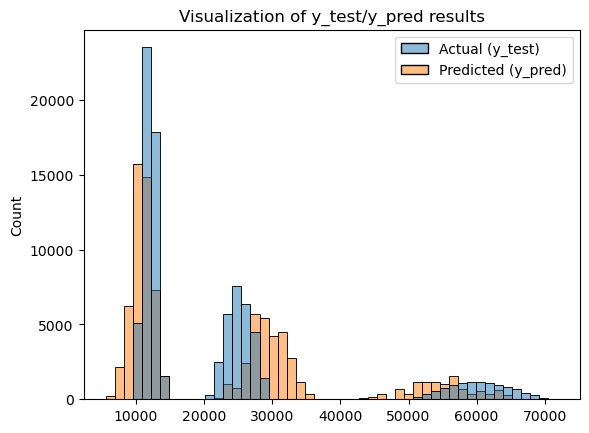

In [100]:
sns.histplot(data=results_df,bins=50).set(title='Visualization of y_test/y_pred results')

We can see that the predicted y give a medium approximation of y_test. 

We can detect a trend but the predictions are not really accurate.

In [101]:
# coefficient estimates 
coefficients = model.params

# let's create a dataframe with all coefficients and stats of interest 
rows = []
for index, value in coefficients.items():
    row = [index, value, model.bse[index], model.tvalues[index], model.pvalues[index]]
    rows.append(row)

summary_coeff = pd.DataFrame(rows, columns=["", "OLS estimation", "SE", "t-stats", "p-value"])
summary_coeff

,,OLS estimation,SE,t-stats,p-value
0,const,6928.273750,70.307094,98.543026,0.000000e+00
1,square_feet,24475.007444,94.869478,257.986108,0.000000e+00
2,avg_customers,18631.988432,75.868830,245.581598,0.000000e+00
3,competitor_distance,-2705.685430,21.766187,-124.306819,0.000000e+00
4,FRANCE,3200.661627,24.988043,128.087725,0.000000e+00
5,ITALY,1527.734357,26.261275,58.174417,0.000000e+00
6,SPAIN,2199.877766,25.598021,85.939367,0.000000e+00
7,market_type,14262.175666,76.064410,187.501298,0.000000e+00
8,has_promotions,-517.691459,93.942112,-5.510750,3.575606e-08


Looking at the p-value of each coefficient we can reject the null hypothesis beacuse we have p-value(<0.05) for each predictors.

We can clearly see that some predictors are more useful than others especially "square_feet","market_type","avg_customers".

We can also check the confidence intervals of each coefficients.

In [102]:
# 95% confidence intervals
confidence_intervals = model.conf_int(alpha=0.05)  # 0.05 for a 95% confidence interval

for index, value in coefficients.items():
    conf_int_tmp = confidence_intervals.loc[index].values
    print(f"The 95% confidence interval for {index} is {conf_int_tmp}")

The 95% confidence interval for const is [6790.47389936 7066.0735999 ]
The 95% confidence interval for square_feet is [24289.06603758 24660.94885055]
The 95% confidence interval for avg_customers is [18483.28774107 18780.68912206]
The 95% confidence interval for competitor_distance is [-2748.34651976 -2663.02433942]
The 95% confidence interval for FRANCE is [3151.68579136 3249.63746199]
The 95% confidence interval for ITALY is [1476.26302459 1579.20568879]
The 95% confidence interval for SPAIN is [2149.7063918  2250.04914072]
The 95% confidence interval for market_type is [14113.09164343 14411.25968925]
The 95% confidence interval for has_promotions is [-701.81525501 -333.56766394]


Now, we have to evaluate the accuracy of our model.

We are interested to compute the MSE test because this feature give a great idea on the accuracy of our predictions.

The MSE of the training data is not very useful because we may overfit if the variance is highest and so the traing MSE can be low but the test MSE can be high. (Bias-Variance trade-off)

We can also compute others statistics like RSE and R2 to have more information about our model.

In [103]:
# model accuracy

y_pred = model.predict(X_test_with_intercept)

# RSE
residuals = y_pred - y_test
RSE = (sum(residuals ** 2) / (len(residuals) - X.shape[1] - 1)) ** 0.5

# R2
R2 = 1 - ((y_test - y_pred) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

# MSE
MSE = ((y_test - y_pred) ** 2).mean()

print(f"The RSE is {round(RSE, 2)}, the R2 is {round(R2, 2)} and the MSE is {round(MSE, 2)}")

The RSE is 4075.63, the R2 is 0.93 and the MSE is 16609081.09


Up to now we have our MSE test error, we wondering if all the predictors are useful for the predictions it means that if we choose subsample of our predictors do we have a better results ? 

In this way and as we have seen in the lectures it could be very interesting to apply the best subset selection algorithm or we can also apply dimension reductions algorithms like Principal Component Analysis (PCA) or Partial Least Squares (PLS).

## Objective 2:

We have finsih objective 1. Now what we want is instead of assume that we have a linear relathionship between predictors and target we are going to try all the models that we have seen in the lectures and in the lab concerning the regression.

We will start by apply best subset selection to collect the best sample of predictors and we can also apply PCA and PLS to compare the set of predictors which is given. 

We will try the following models :
- Ridge
- Lasso
- Polynomial Regression
- Generative additive models (GAM)
- Decision Trees Regression
- Support Vector Regression (SVR) 
- Neural Network

Then we will to pick the best models that is to say the model with The lowest estimated test MSE error.

Finally we will use this model to make prediction on possible future market that means for each type of market we will want to determine which market maximize the sales amount.

We create a list "models_mse" which are going to contain the MSE test for all the models below

In [104]:
models_mse = {"Model":[],"MSE":[]}
# We add the linear model and the value of the MSE
models_mse["Model"].append("Linear_Model")
models_mse["MSE"].append(16609081.09)

For the following we are going to use  df_encoded dataset so we have the idea to create a csv file which contains our data we use this command `df_encoded.to_csv("df_encoded.csv",index=False)`, this is only to help us when we code.

In [105]:
# df_encoded.to_csv("df_encoded.csv",index=False)
# We remain from df_encoded dataset
df_encoded=pd.read_csv("df_encoded.csv")
df_encoded

,market_id,sales_amount,market_type,square_feet,avg_customers,competitor_distance,has_promotions,FRANCE,ITALY,SPAIN
0,XC14,55727.34,2,11135,773.0,515.0,1,False,False,True
1,XC14,58708.78,2,11135,773.0,515.0,1,False,False,True
2,XC14,63651.35,2,11135,773.0,515.0,1,False,False,True
3,XC14,65172.42,2,11135,773.0,515.0,1,False,False,True
4,XC14,56635.94,2,11135,773.0,515.0,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...
435305,QD17,26552.21,1,6806,516.0,10468.0,1,True,False,False
435306,QD17,25417.78,1,6806,516.0,10468.0,1,True,False,False
435307,QD17,27687.06,1,6806,516.0,10468.0,1,True,False,False
435308,QD17,26627.14,1,6806,516.0,10468.0,1,True,False,False


We apply the best subset selection for that we reuse the code from the Lab and replace by our data and MinMaxScaler(). 

For most of the algorithms that follow we use K-fold cross validation which is a relevant method for evaluate a model.

#### FEATURE SELECTION

In [106]:
import itertools
import statsmodels.api as sm
from sklearn.model_selection import KFold

# Step 1: initialize KFold object to use for model evaluation
number_folds = 5
kf = KFold(n_splits=number_folds, shuffle=True, random_state=999)

# Step 2: Load the df_encoded dataset
X = df_encoded[predictors]
y = df_encoded[target]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Step 3: Define a function to calculate RSE, R2, and MSE

def calculate_metrics(y_validation, y_pred, X):
    residuals = y_validation - y_pred
    RSE = (sum(residuals ** 2) / (len(residuals) - X.shape[1] - 1)) ** 0.5
    R2 = 1 - (residuals ** 2).sum() / ((y_validation - y_validation.mean()) ** 2).sum()
    MSE = (residuals ** 2).mean()
    return RSE, R2, MSE

# Step 4: Implement best subset selection
def best_subset_selection(X, y):
    n_features = X.shape[1]
    all_models = []
    best_models = []
    best_metrics = {
        "RSE": float("inf"),
        "R2": -float("inf"),
        "MSE": float("inf"),
    }

    # for each number of features
    for k in range(1, n_features + 1):
        print(f"start iteration {k} of {n_features}")
        # for each combination of k number of features
        for combo in itertools.combinations(X.columns, k):
            model_features = list(combo)
            X_subset = X[model_features]
            # Add a constant for the intercept term
            X_subset = sm.add_constant(X_subset)  
            # initialize empty array to store mse for each fold
            mse_folds = []
            # for each fold fit the model
            for train_idx, validation_idx in kf.split(X_subset):
                X_train, X_validation = X_subset.iloc[train_idx], X_subset.iloc[validation_idx]
                y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]
                model = sm.OLS(y_train, X_train).fit()
                y_pred = model.predict(X_validation)
                RSE, R2, MSE = calculate_metrics(y_validation, y_pred, X[model_features])
                mse_folds.append(MSE)
            # estimate test error using the mean of MSE in all folds
            test_error_estimated = sum(mse_folds) / len(mse_folds)
            # if the estimation of the test error is reduced, save metrics and model
            if test_error_estimated < best_metrics["MSE"]:
                best_metrics["RSE"] = RSE
                best_metrics["R2"] = R2
                best_metrics["MSE"] = test_error_estimated
                best_models = model_features
            # save number of features and estimated test error for plotting
            all_models.append([len(list(combo)), test_error_estimated])

    return best_models, best_metrics, all_models

# Step 5: Calculate and display statistics for each model
best_features, best_metrics, all_models = best_subset_selection(X_scaled, y)

print("-------------------")
print("Finished!")
print("Features with best model:", best_features)
print("RSE:", best_metrics["RSE"])
print("R2:", best_metrics["R2"])
print("MSE:", best_metrics["MSE"])

start iteration 1 of 8
start iteration 2 of 8
start iteration 3 of 8
start iteration 4 of 8
start iteration 5 of 8
start iteration 6 of 8
start iteration 7 of 8
start iteration 8 of 8
-------------------
Finished!
Features with best model: ['square_feet', 'avg_customers', 'competitor_distance', 'FRANCE', 'ITALY', 'market_type', 'has_promotions']
RSE: 4069.3820848295973
R2: 0.932288426005133
MSE: 16526623.45321914


In [107]:
# We add the best linear model trained using the best subset selection algorithm and the value of the MSE
models_mse["Model"].append("Linear_Model_Best_Subset_Selection")
models_mse["MSE"].append(round(best_metrics["MSE"],2))

We can see that with best subset selection we have little improvement of the MSE and the set of features selection does not contain "SPAIN".

We can also display the results on the figure below :

Text(0.5, 0, 'Numbers of predictors')

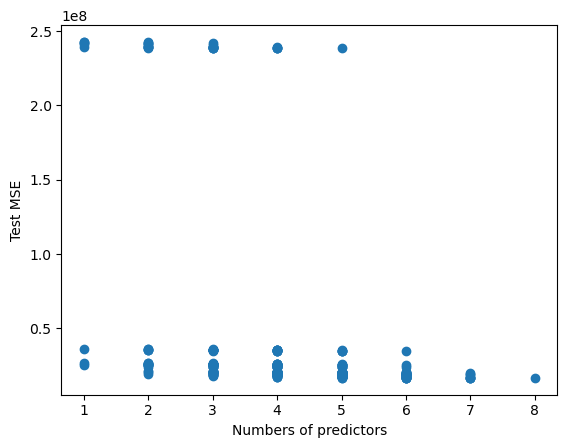

In [108]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=1, nrows=1)
plt.scatter([elem[0] for elem in all_models], [elem[1] for elem in all_models])
plt.ylabel("Test MSE")
plt.xlabel("Numbers of predictors")

Another way to check, if all the predictors are useful, to fit a linear model, could be to run PCA and PLS, two both algorithms of dimension reduction.

As for best subset selection we reuse the code from the Lab

#### DIMENSION REDUCTION

Principal Component Analysis (PCA) 

Best_components_pca 16526623.45321915 7


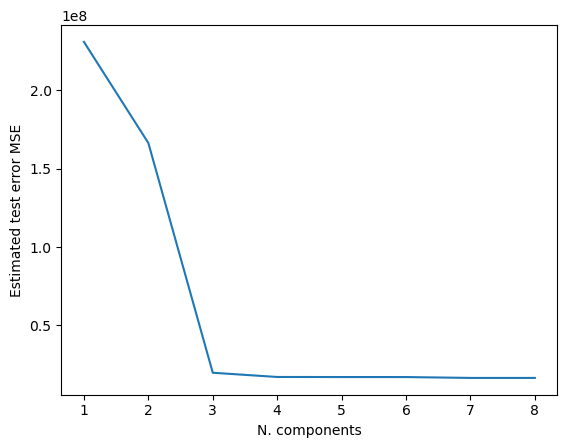

In [109]:
# let's start from PCA
from sklearn.decomposition import PCA

# save test error and n_components
results_pca = []
best_components_pca = {"MSE": float("inf"), "n_components": float("inf")}

# iterate over different values of lambda
for n_components in range(1, len(X_scaled.columns) + 1):
    # transform using n_components for PCA
    pca = PCA(n_components = n_components)
    X_pca = pca.fit_transform(X_scaled)
    X_pca = pd.DataFrame(X_pca)
    
    # Add a constant for the intercept term
    X_pca = sm.add_constant(X_pca)  
    # initialize empty array to store mse for each fold
    mse_folds = []
    # for each fold fit the model
    for train_idx, validation_idx in kf.split(X_pca):
        X_train, X_validation = X_pca.iloc[train_idx], X_pca.iloc[validation_idx]
        y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]
        model = sm.OLS(y_train, X_train).fit()
        y_pred = model.predict(X_validation)
        RSE, R2, MSE = calculate_metrics(y_validation, y_pred, X_train)
        mse_folds.append(MSE)
    # estimate test error using the mean of MSE in all folds
    test_error_estimated = sum(mse_folds) / len(mse_folds)
    # append
    results_pca.append([test_error_estimated, n_components])
    # check if model improved
    if test_error_estimated < best_components_pca["MSE"]:
        best_components_pca["MSE"] = test_error_estimated
        best_components_pca["n_components"] = n_components

# plot estimated test MSE for each value of lambda
fig, ax = plt.subplots(ncols=1, nrows=1)
plt.plot([elem[1] for elem in results_pca], [elem[0] for elem in results_pca])
plt.xlabel("N. components")
plt.ylabel("Estimated test error MSE")
print("Best_components_pca",best_components_pca["MSE"],best_components_pca["n_components"])

In [110]:
##### We add the best linear model trained using the Principal Component Analysis (PCA) algorithm and the value of the MSE
models_mse["Model"].append("Linear_Model_PCA")
models_mse["MSE"].append(round(best_components_pca["MSE"],2))

We obtain the same result than best subset selection, the MSE is exactly the same than above (16526623.45321914) and we have 7 predictors. 

We can run the second algorithm PLS to compare.

Partial Least Square (PLS)

Best_components_pls 16526623.45321915 7


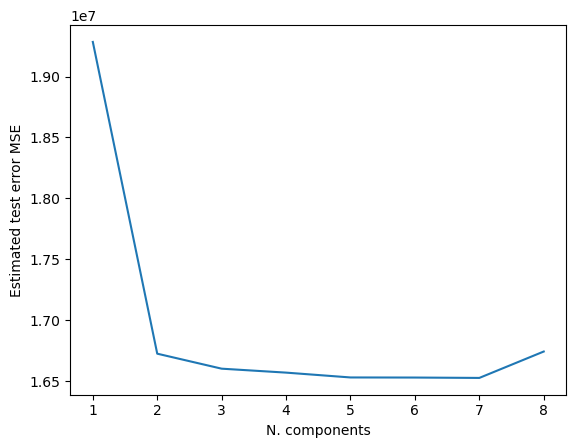

In [111]:
# finally, let's see PLS
from sklearn.cross_decomposition  import PLSRegression

# save test error and n_components
results_pls = []
best_components_pls = {"MSE": float("inf"), "n_components": float("inf")}

# iterate over different values of lambda
for n_components in range(1, len(X_scaled.columns) + 1):
    # transform using n_components for PLS
    pls = PLSRegression(n_components = n_components)

    # Note that for PLS the syntax is a bit different from the previous models
    
    # initialize empty array to store mse for each fold
    mse_folds = []
    # for each fold fit the model
    for train_idx, validation_idx in kf.split(X_scaled):
        X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
        y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]
        pls.fit(X_train, y_train)
        y_pred = pls.predict(X_validation)
        y_pred = pd.Series([elem[0] for elem in y_pred])
        RSE, R2, MSE = calculate_metrics(y_validation.reset_index(drop=True), y_pred, X_train) 
        
        mse_folds.append(MSE)
    # estimate test error using the mean of MSE in all folds
    test_error_estimated = sum(mse_folds) / len(mse_folds)
    # append
    results_pls.append([test_error_estimated, n_components])
    # check if model improved
    if test_error_estimated < best_components_pls["MSE"]:
        best_components_pls["MSE"] = test_error_estimated
        best_components_pls["n_components"] = n_components

# plot estimated test MSE for each value of lambda
fig, ax = plt.subplots(ncols=1, nrows=1)
plt.plot([elem[1] for elem in results_pls], [elem[0] for elem in results_pls])
plt.xlabel("N. components")
plt.ylabel("Estimated test error MSE")
print("Best_components_pls",best_components_pls["MSE"],best_components_pls["n_components"])

In [112]:
##### We add the best linear model trained using the Principal Component Analysis (PCA) algorithm and the value of the MSE
models_mse["Model"].append("Linear_Model_PLS")
models_mse["MSE"].append(round(best_components_pls["MSE"],2))

Exactly the same resuult !! 

For the following we are going to use the predictors from best subset selection.

In [113]:
predictors = best_features
predictors

['square_feet',
 'avg_customers',
 'competitor_distance',
 'FRANCE',
 'ITALY',
 'market_type',
 'has_promotions']

Up to now, we can try the models from the shrinkage methods that we have seen Ridge and Lasso.

These models are linear model where we applied a penalization term on the beta coefficients, with Ridge we use the L2-norm and with Lasso we use the L1-norm.

As before we reuse the code seen in the Lab. 


In [114]:
# filter data based on best_features
X_subset = df_encoded[predictors]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_subset)
X_scaled = pd.DataFrame(X_scaled, columns=X_subset.columns)

#### SHRINKAGE METHODS
Ridge and Lasso regression are based on linear regression model, adding a penalty term. 

This penalty term is a factor $\lambda$, multiplied by the sum of the linear's coefficients norms, for each feature of the linear regression. 

Ridge -> Euclidian Norm

Lasso -> Norm 1 (abs)

RIDGE REGRESSION

MSE Ridge  16526623.441087464 Lambda  0.17179999999999998


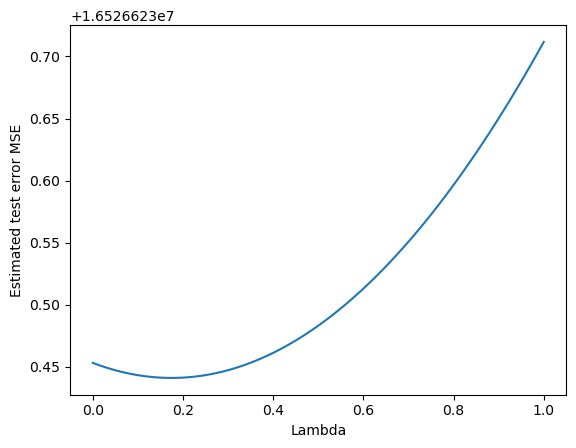

In [115]:
from sklearn.linear_model import Ridge
import numpy as np

# save test error and lambda values
results_ridge = []
best_lmbd_ridge = {"MSE": float("inf"), "lmbd": float("inf")}

# iterate over different values of lambda
for lmbd in np.linspace(0.0001, 1, 100):
    # initialize empty array to store mse for each fold
    mse_folds = []
    # for each fold fit the model
    for train_idx, validation_idx in kf.split(X_scaled):
        X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
        y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]
        model = Ridge(alpha=lmbd).fit(X_train, y_train)
        y_pred = model.predict(X_validation)
        RSE, R2, MSE = calculate_metrics(y_validation, y_pred, X_subset)
        mse_folds.append(MSE)
    # estimate test error using the mean of MSE in all folds
    test_error_estimated = sum(mse_folds) / len(mse_folds)
    # append
    results_ridge.append([test_error_estimated, lmbd])
    # check if model improved
    if test_error_estimated < best_lmbd_ridge["MSE"]:
        best_lmbd_ridge["MSE"] = test_error_estimated
        best_lmbd_ridge["lmbd"] = lmbd

# plot estimated test MSE for each value of lambda
fig, ax = plt.subplots(ncols=1, nrows=1)
plt.plot([elem[1] for elem in results_ridge], [elem[0] for elem in results_ridge])
plt.xlabel("Lambda")
plt.ylabel("Estimated test error MSE")
print("MSE Ridge ",best_lmbd_ridge["MSE"],"Lambda ",best_lmbd_ridge["lmbd"])

The result isn't much better than those of the normal linear model. Due to the big values and the number of the coefficient predictors, we can't have a big value for lambda, before that the penality term make the mse bigger.

In [116]:
# We add Ridge and the value of the MSE
models_mse["Model"].append("Ridge")
models_mse["MSE"].append(best_lmbd_ridge["MSE"])

LASSO REGRESSION

MSE Lasso 16526623.453002308 Lambda  0.0001


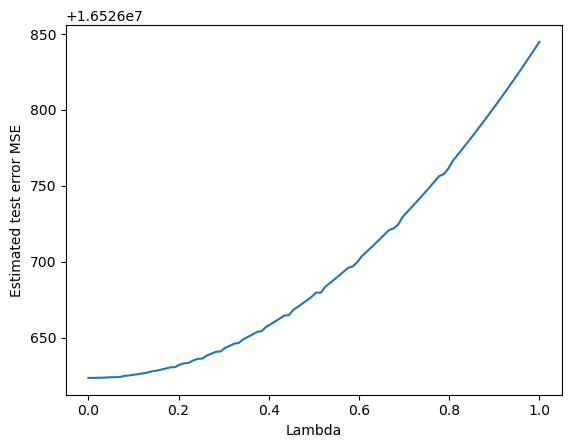

In [117]:
# let's now run Lasso instead of Ridge
from sklearn.linear_model import Lasso

# save test error and lambda values
results_lasso = []
best_lmbd_lasso = {"MSE": float("inf"), "lmbd": float("inf")}

# iterate over different values of lambda
for lmbd in np.linspace(0.0001, 1, 100):
    # initialize empty array to store mse for each fold
    mse_folds = []
    # for each fold fit the model
    for train_idx, validation_idx in kf.split(X_scaled):
        X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
        y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]
        model = Lasso(alpha=lmbd).fit(X_train, y_train)
        y_pred = model.predict(X_validation)
        RSE, R2, MSE = calculate_metrics(y_validation, y_pred, X_subset)
        mse_folds.append(MSE)
    # estimate test error using the mean of MSE in all folds
    test_error_estimated = sum(mse_folds) / len(mse_folds)
    # append
    results_lasso.append([test_error_estimated, lmbd])
    # check if model improved
    if test_error_estimated < best_lmbd_lasso["MSE"]:
        best_lmbd_lasso["MSE"] = test_error_estimated
        best_lmbd_lasso["lmbd"] = lmbd

# plot estimated test MSE for each value of lambda
fig, ax = plt.subplots(ncols=1, nrows=1)
plt.plot([elem[1] for elem in results_lasso], [elem[0] for elem in results_lasso])
plt.xlabel("Lambda")
plt.ylabel("Estimated test error MSE")
print("MSE Lasso",best_lmbd_lasso["MSE"],"Lambda ",best_lmbd_lasso["lmbd"])

As for ridge regression, the value of lambda on the penality term, make the MSE bigger very quickly. These two models are not much better than the original linear model.

In [118]:
# We add Lasso and the value of the MSE
models_mse["Model"].append("Lasso")
models_mse["MSE"].append(best_lmbd_lasso["MSE"])

Now, we are going to use non-linear model for the regression.

We start to  try the polynomial regression with differents orders. As before we reuse the code from the previous Lab

POLYNOMIAL REGRESSION (order 2)

In [119]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Number of splits for k-fold cross-validation
k = 5  

# Split the data into k folds manually
kf = KFold(n_splits=k, shuffle=True, random_state=99)

# Initialize an array to store MSE values for each fold
mse_folds = []

# run k-fold cv
for train_idx, validation_idx in kf.split(X_scaled):
    X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
    y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

    # polynomial degree 2
    poly = PolynomialFeatures(2)
    X_train_poly = poly.fit_transform(X_train)
    X_validation_poly = poly.fit_transform(X_validation)

    # fit model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # get predictions
    y_pred = model.predict(X_validation_poly)
    current_mse = ((y_validation - y_pred)**2).mean()
    mse_folds.append(current_mse)

   
# Calculate the mean MSE across folds
estimated_test_error = sum(mse_folds) / len(mse_folds)
print(f"The estimated test MSE error is {round(estimated_test_error, 2)}")

The estimated test MSE error is 2486403.36


Compare to previous results test MSE is very low !!

In [120]:
# We add Polynomial regression order 2 and the value of the MSE
models_mse["Model"].append("Polynomial_Regression_order_2")
models_mse["MSE"].append(round(estimated_test_error, 2))

POLYNOMIAL REGRESSION (order 3)

In [121]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Number of splits for k-fold cross-validation
k = 5  

# Split the data into k folds manually
kf = KFold(n_splits=k, shuffle=True, random_state=99)

# Initialize an array to store MSE values for each fold
mse_folds = []

# run k-fold cv
for train_idx, validation_idx in kf.split(X_scaled):
    X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
    y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

    # polynomial degree 2
    poly = PolynomialFeatures(3)
    X_train_poly = poly.fit_transform(X_train)
    X_validation_poly = poly.fit_transform(X_validation)

    # fit model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # get predictions
    y_pred = model.predict(X_validation_poly)
    current_mse = ((y_validation - y_pred)**2).mean()
    mse_folds.append(current_mse)

   
# Calculate the mean MSE across folds
estimated_test_error = sum(mse_folds) / len(mse_folds)
print(f"The estimated test MSE error is {round(estimated_test_error, 2)}")

The estimated test MSE error is 2464411.8


It's a quite better !! 

If we fit a polynomial regression of order 4, we still get a very little bit smaller estimated test error. But if we continue to increase the order of the polynomial regression, the model will overfit the datas.

In [122]:
# We add Polynomial regression order 3 and the value of the MSE
models_mse["Model"].append("Polynomial_Regression_order_3")
models_mse["MSE"].append(round(estimated_test_error, 2))

We try with a generalized additive model, as before we reuse the code seen in Lab 

GENERALIZED ADDITIVE MODEL

In [123]:
from pygam import LinearGAM, s
from functools import reduce

# initialize MSE and lambda
best_lmbd_gam = {"MSE": float("inf"), "lmbd": float("inf")}

# test different values of lambda (control smoothness)
for lmbd in np.linspace(0, 1, 10):

    # Initialize an array to store MSE values for each fold
    mse_folds = []

    # run k-fold cv
    for train_idx, validation_idx in kf.split(X_scaled):
        X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
        y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

        # fit GAM: for each predictor add a smoothing spline (i.e. s(i)) and use lambda to control smoothness
        s_terms = [s(i, lam=lmbd) for i in range(len(X_train.columns))]
        gam = LinearGAM(reduce(lambda x, y: x + y, s_terms))
        gam.fit(X_train, y_train)

        # get predictions
        y_pred = gam.predict(X_validation)
        current_mse = ((y_validation - y_pred)**2).mean()
        mse_folds.append(current_mse)
    
    # Calculate the mean MSE across folds
    estimated_test_error = sum(mse_folds) / len(mse_folds)

    # check if the estimated_test_error has decreased
    if estimated_test_error < best_lmbd_gam["MSE"]:
        best_lmbd_gam["MSE"] = estimated_test_error
        best_lmbd_gam["lmbd"] = lmbd

print(f"The lowest estimated test error MSE is {round(best_lmbd_gam['MSE'], 2)}, obtained when lambda = {round(best_lmbd_gam['lmbd'], 2)}")


The lowest estimated test error MSE is 2789000.52, obtained when lambda = 0.11


In [124]:
# We add GAM and the value of the MSE
models_mse["Model"].append("GAM")
models_mse["MSE"].append(round(estimated_test_error, 2))

Now, we try to make predictions with decision trees for regression. As before we reuse the code seen in the previous Lab.

#### DECISION TREES REGRESSION

We try for three differents methods of Decision Trees : 
- Pruning
- Random Forrest
- Gradient Boosting


PRUNING

In [125]:
from sklearn.tree import DecisionTreeRegressor

# initialize MSE and alpha
best_alpha = {"MSE": float("inf"), "alpha": float("inf")}

# fit a decision tree with all data to derive the alpha values (for tree pruning)
tree = DecisionTreeRegressor(random_state=99)
tree.fit(X_scaled, y)

# get alpha values
alphas = []
for node in tree.cost_complexity_pruning_path(X_scaled, y).impurities:
    alphas.append(max(0, node))
    
# test different values of alpha (control tree complexity)
for alpha in alphas:

    # Initialize an array to store MSE values for each fold
    mse_folds = []

    # run k-fold cv
    for train_idx, validation_idx in kf.split(X_scaled):
        X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
        y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

        # fit pruned tree
        pruned_tree = DecisionTreeRegressor(ccp_alpha=alpha, random_state=99)
        pruned_tree.fit(X_train, y_train)

        # get predictions
        y_pred = pruned_tree.predict(X_validation)
        current_mse = ((y_validation - y_pred)**2).mean()
        mse_folds.append(current_mse)
    
    # Calculate the mean MSE across folds
    estimated_test_error = sum(mse_folds) / len(mse_folds)

    # check if the estimated_test_error has decreased
    if estimated_test_error < best_alpha["MSE"]:
        best_alpha["MSE"] = estimated_test_error
        best_alpha["alpha"] = alpha

print(f"The lowest estimated test error MSE is {round(best_alpha['MSE'], 2)}, obtained when alpha = {round(best_alpha['alpha'], 2)}")

# Train the final decision tree with the best alpha value and evaluate it on the test data
final_tree = DecisionTreeRegressor(ccp_alpha=best_alpha['alpha'], random_state=99)
final_tree.fit(X_scaled, y)
print("MSE ", round(best_alpha['MSE'], 2)," alpha ", round(best_alpha['alpha'], 2))

The lowest estimated test error MSE is 3672416.17, obtained when alpha = 2454203.72
MSE  3672416.17  alpha  2454203.72


This results for a simple pruned decision tree is interesting, but not better than polynomial regression of order 3.

In [126]:
# We add Pruning and the value of the MSE
models_mse["Model"].append("Pruning")
models_mse["MSE"].append(round(best_alpha['MSE'], 2))

RANDOM FOREST

In [127]:
from sklearn.ensemble import RandomForestRegressor

# Initialize an array to store MSE values for each fold
mse_folds = []

# run k-fold cv
for train_idx, validation_idx in kf.split(X_scaled):
    X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
    y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

    # create a Random Forest 
    RF_model = RandomForestRegressor(n_estimators=100, max_features="sqrt", random_state=99)

    # fit the model to the training data
    RF_model.fit(X_train, y_train)

    # make predictions 
    y_pred = RF_model.predict(X_validation)
    current_mse = ((y_validation - y_pred)**2).mean()
    mse_folds.append(current_mse)

   
# Calculate the mean MSE across folds
estimated_test_error = sum(mse_folds) / len(mse_folds)
print(f"The estimated test MSE error is {round(estimated_test_error, 2)}")

The estimated test MSE error is 2463884.78


This result for random forest algorithm, is better than the estimated test error(MSE) from polynomial regression of order 3.

In [128]:
# We add RandomForest and the value of the MSE
models_mse["Model"].append("RandomForest")
models_mse["MSE"].append(round(estimated_test_error, 2))

GRADIENT BOOSTING

In [129]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize an array to store MSE values for each fold
mse_folds = []

# run k-fold cv
for train_idx, validation_idx in kf.split(X_scaled):
    X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
    y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

    # create a Random Forest 
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=99)

    # fit the model to the training data
    model.fit(X_train, y_train)

    # make predictions 
    y_pred = model.predict(X_validation)
    current_mse = ((y_validation - y_pred)**2).mean()
    mse_folds.append(current_mse)

   
# Calculate the mean MSE across folds
estimated_test_error = sum(mse_folds) / len(mse_folds)
print(f"The estimated test MSE error is {round(estimated_test_error, 2)}")

The estimated test MSE error is 2464340.8


The Gradient Boosting algorithm gives really great results, this estimated test error is very close to the one, from the random forest algorithm. But random forest remain the better one.

In [130]:
# We add GradientBoosting and the value of the MSE
models_mse["Model"].append("GradientBoosting")
models_mse["MSE"].append(round(estimated_test_error, 2))

### SUPPORT VECTOR REGRESSION (LAB5)

Unfortunately, the support vector regression is far too computationaly expensive. Despite numerous attempts, in order to reduce the number of computations, we didn't even manage to train just one model.

In [131]:
"""from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

# split data into X and Y
X = df_encoded[["square_feet","avg_customers","competitor_distance","FRANCE","ITALY","SPAIN","market_type","has_promotions"]]
y = df_encoded["sales_amount"]

# filter data based on best_features (taken from Lab3!)
best_features = ["square_feet","avg_customers","competitor_distance","FRANCE","ITALY","market_type","has_promotions"]
X_subset = X[best_features]

# Standardize features by removing the mean and scaling to unit variance
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_subset)
X_scaled = pd.DataFrame(X_scaled, columns=X_subset.columns)"""

'from sklearn.model_selection import KFold\nfrom sklearn.metrics import confusion_matrix\n\n# split data into X and Y\nX = df_encoded[["square_feet","avg_customers","competitor_distance","FRANCE","ITALY","SPAIN","market_type","has_promotions"]]\ny = df_encoded["sales_amount"]\n\n# filter data based on best_features (taken from Lab3!)\nbest_features = ["square_feet","avg_customers","competitor_distance","FRANCE","ITALY","market_type","has_promotions"]\nX_subset = X[best_features]\n\n# Standardize features by removing the mean and scaling to unit variance\nscaler = MinMaxScaler()\nX_scaled = scaler.fit_transform(X_subset)\nX_scaled = pd.DataFrame(X_scaled, columns=X_subset.columns)'

In [132]:
"""from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import numpy as np

# find best parameters
parameters = {
    'C': np.linspace(1, 10, 2).tolist(), 
    'kernel': ['poly'], # here you can test for 'poly', 'linear', and others (check the docs!)
    'gamma': ['scale', 'auto'] + np.linspace(0.001, 5, 5).tolist(), 
}

# Create the SVM model
svm = SVR()

# Create the GridSearchCV
grid_search = GridSearchCV(svm, parameters, cv=5)  

# Fit the GridSearchCV to the training data
grid_search.fit(X_scaled, y)

# Get the best parameters and the best score
best_params = grid_search.best_params_

print(best_params)"""

"from sklearn.svm import SVR\nfrom sklearn.model_selection import GridSearchCV\nimport numpy as np\n\n# find best parameters\nparameters = {\n    'C': np.linspace(1, 10, 2).tolist(), \n    'kernel': ['poly'], # here you can test for 'poly', 'linear', and others (check the docs!)\n    'gamma': ['scale', 'auto'] + np.linspace(0.001, 5, 5).tolist(), \n}\n\n# Create the SVM model\nsvm = SVR()\n\n# Create the GridSearchCV\ngrid_search = GridSearchCV(svm, parameters, cv=5)  \n\n# Fit the GridSearchCV to the training data\ngrid_search.fit(X_scaled, y)\n\n# Get the best parameters and the best score\nbest_params = grid_search.best_params_\n\nprint(best_params)"

In [133]:
"""# Now we can run k-fold using the best parameters

# Initialize an array to store MSE values for each fold
mse_folds = []

# run k-fold cv
for train_idx, validation_idx in kf.split(X_scaled):
    X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]
    y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]

    # fit model
    model = SVR(C=best_params["C"], kernel=best_params["kernel"], gamma=best_params["gamma"]) 
    model.fit(X_train, y_train)

    # get predictions
    y_pred = model.predict(X_validation)
    current_mse = ((y_validation - y_pred)**2).mean()
    mse_folds.append(current_mse)

# Calculate the mean MSE across folds
estimated_test_error = sum(mse_folds) / len(mse_folds)
print(f"The estimated test MSE error is {round(estimated_test_error, 2)}")"""

'# Now we can run k-fold using the best parameters\n\n# Initialize an array to store MSE values for each fold\nmse_folds = []\n\n# run k-fold cv\nfor train_idx, validation_idx in kf.split(X_scaled):\n    X_train, X_validation = X_scaled.iloc[train_idx], X_scaled.iloc[validation_idx]\n    y_train, y_validation = y.iloc[train_idx], y.iloc[validation_idx]\n\n    # fit model\n    model = SVR(C=best_params["C"], kernel=best_params["kernel"], gamma=best_params["gamma"]) \n    model.fit(X_train, y_train)\n\n    # get predictions\n    y_pred = model.predict(X_validation)\n    current_mse = ((y_validation - y_pred)**2).mean()\n    mse_folds.append(current_mse)\n\n# Calculate the mean MSE across folds\nestimated_test_error = sum(mse_folds) / len(mse_folds)\nprint(f"The estimated test MSE error is {round(estimated_test_error, 2)}")'

### REGRESSION NEURAL NETWORK (LAB 6 et 7)

Thanks to the introduction to the package torch of the lab 7 and a deeper exploration on this package, we have produce this code, in order to fit a neural network.

In [134]:
# split data into X and Y
X = df_encoded[["square_feet","avg_customers","competitor_distance","FRANCE","ITALY","SPAIN","market_type","has_promotions"]]
y = df_encoded["sales_amount"]

# filter data based on best_features (taken from Lab3!)
best_features = ["square_feet","avg_customers","competitor_distance","FRANCE","ITALY","market_type","has_promotions"]
X_subset = X[best_features]

# Standardize features by removing the mean and scaling to unit variance
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_subset)
#X_scaled = pd.DataFrame(X_scaled, columns=X_subset.columns)

# reshape y so to have n rows and 1 column
y = y.to_numpy().reshape(-1, 1)  

# split the dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=99)

In [135]:
import torch.nn as nn
import torch.optim as optim

class BetterRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(BetterRegressionModel, self).__init__()
        self.fc = nn.Sequential(nn.Linear(input_size, 16),nn.ReLU(),
                                nn.Linear(16, 32),nn.ReLU(),
                                nn.Linear(32, 16),nn.ReLU(),
                                nn.Linear(16, 8),nn.ReLU(),
                                nn.Linear(8, 4),nn.ReLU(),
                                nn.Linear(4, 2),nn.ReLU(),
                                nn.Linear(2,1))
    def forward(self, x):
        x = self.fc(x)
        return x

# Initialisation of the model
input_size = 7
NN_model = BetterRegressionModel(input_size)

# Choice of the loss function and of the type of optimizer.
criterion = nn.MSELoss()
optimizer = optim.Adam(NN_model.parameters(), lr=0.1)

# Loading of the training and testing datasets (X_train, y_train) as PyTorch tensor.
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_val)
y_test_tensor = torch.FloatTensor(y_val)

# Training of the NN model using mini-batchs in several epochs.
batch_size = 64
num_epochs = 10
for epoch in range(num_epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        # Extraction of the mini-batch
        X_batch = X_train_tensor[i:i+batch_size]
        y_batch = y_train_tensor[i:i+batch_size]

        # Forward pass
        outputs = NN_model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print the traing loss at each epoche (after a training with all mini-batch)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 3120892.0000
Epoch [2/10], Loss: 3467102.0000
Epoch [3/10], Loss: 3802616.2500
Epoch [4/10], Loss: 4690027.5000
Epoch [5/10], Loss: 5723488.5000
Epoch [6/10], Loss: 6817838.5000
Epoch [7/10], Loss: 6689236.0000
Epoch [8/10], Loss: 6050348.0000
Epoch [9/10], Loss: 6074342.0000
Epoch [10/10], Loss: 5693640.0000


In [136]:
# Use of the trained network to make some predictions on the validation dataset.
with torch.no_grad():
    NN_model.eval()
    y_pred = NN_model.forward(X_test_tensor)
    valid_loss = criterion(y_pred, y_test_tensor)
    print(f'The estimated test MSE is: {valid_loss.item()}')

The estimated test MSE is: 3330243.0


Despite very numerous tries, with differents architectures for the neural networks and differents initialisation for their fitting, we can't have obtained a better estimated test error than around 3 000 000, which is not better than the result of random forest.

In [137]:
# We add NeuralNetwork and the value of the MSE
models_mse["Model"].append("NeuralNetwork")
models_mse["MSE"].append(round(valid_loss.item(), 2))

### LSTM LONG SHORT TERM MEMORY (LAB7)

It's an application model, for times series, not for regression.

## Choose of the best model fitted:

Comparasion of the different MSE of all fitted models and choose of the model with the lowest estimated test error(mse).

In [138]:
results=pd.DataFrame(models_mse)
results

,Model,MSE
0,Linear_Model,1.660908e+07
1,Linear_Model_Best_Subset_Selection,1.652662e+07
2,Linear_Model_PCA,1.652662e+07
3,Linear_Model_PLS,1.652662e+07
4,Ridge,1.652662e+07
5,Lasso,1.652662e+07
6,Polynomial_Regression_order_2,2.486403e+06
7,Polynomial_Regression_order_3,2.464412e+06
8,GAM,2.789227e+06
9,Pruning,3.672416e+06


In [139]:
# We get the name of the model, giving the lowest estimated test error (mse) among all trained ones.
results.iloc[np.argmin(results["MSE"].to_numpy())]

Model    RandomForest
MSE        2463884.78
Name: 10, dtype: object

We conclude that the best fitting model for these datas is the Random Forest Regression.

## Predictions:

Now that we have found the best fitting model, for the datas of the retail company. We want to answer their problematic concerning the new markets, that the company wants to open in 2024.

The company wants one new Minimarket, one new Supermarket and also one new Hypermarket. For each type of markets, we have three potentials candidates, with its available and estimated features.

We will use our best fitting model found previously, now fitted on the whole available training datasets, to make predictions of the potentials sales amounts, for each of these markets candidates. For each type of market, the one with the higher sales amount predictions, will be choosen.

#### Construction of the dataframe for the markets candidates:

In [140]:
market_candidate=pd.DataFrame.from_dict({"country":["SPAIN","FRANCE","ITALY","SPAIN","FRANCE","ITALY","SPAIN","FRANCE","ITALY"],"square_feet":[1850,2100,1920,5880,5120,4970,10560,12570,11980],"avg_customers":[190,215,220,420,390,410,860,880,790],"competitor_distance":[4500,1850,1450,580,2560,3520,8940,7580,11560],"has_promotions":["YES","YES","YES","YES","YES","YES","YES","YES","YES"],"market_type":["MINI","MINI","MINI","SUPER","SUPER","SUPER","HYPER","HYPER","HYPER"]})
market_candidate

,country,square_feet,avg_customers,competitor_distance,has_promotions,market_type
0,SPAIN,1850,190,4500,YES,MINI
1,FRANCE,2100,215,1850,YES,MINI
2,ITALY,1920,220,1450,YES,MINI
3,SPAIN,5880,420,580,YES,SUPER
4,FRANCE,5120,390,2560,YES,SUPER
5,ITALY,4970,410,3520,YES,SUPER
6,SPAIN,10560,860,8940,YES,HYPER
7,FRANCE,12570,880,7580,YES,HYPER
8,ITALY,11980,790,11560,YES,HYPER


#### Encoding of the categoricals predictors:

In [141]:
candidate_encoded=market_candidate.copy()
candidate_encoded["market_type"] = candidate_encoded["market_type"].map({"MINI": 0, "SUPER": 1, "HYPER": 2})
candidate_encoded["has_promotions"] = candidate_encoded["has_promotions"].map({"NO": 0, "YES": 1})
# Use get_dummies() function for dummy encoding
candidate_encoded=pd.get_dummies(data=candidate_encoded, columns=["country"],drop_first=False)
candidate_encoded = candidate_encoded.rename(columns={"country_ITALY":"ITALY","country_SPAIN":"SPAIN","country_FRANCE":"FRANCE"})
candidate_encoded

,square_feet,avg_customers,competitor_distance,has_promotions,market_type,FRANCE,ITALY,SPAIN
0,1850,190,4500,1,0,False,False,True
1,2100,215,1850,1,0,True,False,False
2,1920,220,1450,1,0,False,True,False
3,5880,420,580,1,1,False,False,True
4,5120,390,2560,1,1,True,False,False
5,4970,410,3520,1,1,False,True,False
6,10560,860,8940,1,2,False,False,True
7,12570,880,7580,1,2,True,False,False
8,11980,790,11560,1,2,False,True,False


In [142]:
candidate_encoded=candidate_encoded[predictors]
candidate_encoded

,square_feet,avg_customers,competitor_distance,FRANCE,ITALY,market_type,has_promotions
0,1850,190,4500,False,False,0,1
1,2100,215,1850,True,False,0,1
2,1920,220,1450,False,True,0,1
3,5880,420,580,False,False,1,1
4,5120,390,2560,True,False,1,1
5,4970,410,3520,False,True,1,1
6,10560,860,8940,False,False,2,1
7,12570,880,7580,True,False,2,1
8,11980,790,11560,False,True,2,1


#### Standardization of the values:

In [143]:
scaler = MinMaxScaler()
candidate_scaled = scaler.fit_transform(candidate_encoded)
candidate_scaled = pd.DataFrame(candidate_scaled, columns=candidate_encoded.columns)
candidate_scaled 

,square_feet,avg_customers,competitor_distance,FRANCE,ITALY,market_type,has_promotions
0,0.000000,0.000000,0.357013,0.0,0.0,0.0,0.0
1,0.023321,0.036232,0.115665,1.0,0.0,0.0,0.0
2,0.006530,0.043478,0.079235,0.0,1.0,0.0,0.0
3,0.375933,0.333333,0.000000,0.0,0.0,0.5,0.0
4,0.305037,0.289855,0.180328,1.0,0.0,0.5,0.0
5,0.291045,0.318841,0.267760,0.0,1.0,0.5,0.0
6,0.812500,0.971014,0.761384,0.0,0.0,1.0,0.0
7,1.000000,1.000000,0.637523,1.0,0.0,1.0,0.0
8,0.944963,0.869565,1.000000,0.0,1.0,1.0,0.0


#### Predictions of sales amount, on the markets candidates:

In [144]:
# we use the Random Forest trained model to make predictions on our candidates.
new_pred = RF_model.predict(candidate_scaled)
market_candidate["sales predictions"]=new_pred
market_candidate

,country,square_feet,avg_customers,competitor_distance,has_promotions,market_type,sales predictions
0,SPAIN,1850,190,4500,YES,MINI,11869.301876
1,FRANCE,2100,215,1850,YES,MINI,12469.463184
2,ITALY,1920,220,1450,YES,MINI,11554.903954
3,SPAIN,5880,420,580,YES,SUPER,23883.780928
4,FRANCE,5120,390,2560,YES,SUPER,24609.504282
5,ITALY,4970,410,3520,YES,SUPER,22604.965265
6,SPAIN,10560,860,8940,YES,HYPER,56818.672135
7,FRANCE,12570,880,7580,YES,HYPER,58743.309747
8,ITALY,11980,790,11560,YES,HYPER,54017.406737


In [145]:
market_candidate.groupby(by="market_type")["sales predictions"].max()

market_type
HYPER    58743.309747
MINI     12469.463184
SUPER    24609.504282
Name: sales predictions, dtype: float64

From these predictions, we can answer to the company that the best choice, among the candidates is:
- the french market, for the minimarket, with potential sales amount of 12469.46
- the french market, for the supermarket, with potential sales amount of 24609.50
- the french market, for the hypermarket, with potential sales amount of 58743.30

## End of the project.